#**Unpickling the data**

In [ ]:
from google.colab import drive
drive.mount("/content/drive")
!ls "drive/Shared drives/PMDL Project"

Mounted at /content/drive
 CNN.ipynb		     Datasets		  'Old Notebooks'
 CNN_With_SA.ipynb	     LSTM.ipynb		  'Spam filter 2.zip'
'Data Preprocessing.ipynb'  'LSTM with SA.ipynb'  'Spam Filter.zip'


In [ ]:
import pickle
import keras

from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.initializers import Constant
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import concatenate
import tensorflow as tf

import matplotlib.pyplot as plt
import numpy as np

In [ ]:
dataset_dir = "drive/Shared drives/PMDL Project/Datasets"

pickle_off_x_tr = open(dataset_dir + "/train_padded.pickle","rb")
train_padded = pickle.load(pickle_off_x_tr)

pickle_off_y_tr = open(dataset_dir + "/train_labels.pickle","rb")
train_labels = pickle.load(pickle_off_y_tr)

pickle_off_x_test = open(dataset_dir + "/test_padded.pickle","rb")
test_padded = pickle.load(pickle_off_x_test)

pickle_off_y_test = open(dataset_dir + "/test_labels.pickle","rb")
test_labels = pickle.load(pickle_off_y_test)

In [ ]:
def train_and_vizualize_model(model, epochs_num):
  history = model.fit(
    train_padded, train_labels, batch_size=32, epochs=epochs_num, validation_data=(test_padded, test_labels),
)
  x = range(1,epochs_num + 1)
  plt.plot(x, history.history['loss'], 'r', label='Training Loss')
  plt.plot(x,history.history['val_loss'], 'b', label='Validation Loss')

  plt.xlabel('Epoch')
  plt.legend()
  plt.show()

In [ ]:
num_total_words = 564273
max_length = 100

# **Basic Model**

In [ ]:
model = Sequential()

model.add(Embedding(num_total_words, 32, input_length=max_length))
model.add(LSTM(64, dropout=0.5))
model.add(Dense(1, activation="sigmoid"))


optimizer = Adam(learning_rate=3e-4)

model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 32)           18056736  
                                                                 
 lstm (LSTM)                 (None, 64)                24832     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 18,081,633
Trainable params: 18,081,633
Non-trainable params: 0
_________________________________________________________________


Epoch 1/20
149/149 [==============================] - 4s 14ms/step - loss: 0.6605 - accuracy: 0.5718 - val_loss: 0.5454 - val_accuracy: 0.6956
Epoch 2/20
149/149 [==============================] - 2s 12ms/step - loss: 0.2272 - accuracy: 0.9283 - val_loss: 0.1162 - val_accuracy: 0.9688
Epoch 3/20
149/149 [==============================] - 2s 12ms/step - loss: 0.0711 - accuracy: 0.9781 - val_loss: 0.0847 - val_accuracy: 0.9654
Epoch 4/20
149/149 [==============================] - 2s 12ms/step - loss: 0.0398 - accuracy: 0.9897 - val_loss: 0.0903 - val_accuracy: 0.9730
Epoch 5/20
149/149 [==============================] - 2s 12ms/step - loss: 0.0300 - accuracy: 0.9914 - val_loss: 0.1164 - val_accuracy: 0.9663
Epoch 6/20
149/149 [==============================] - 2s 12ms/step - loss: 0.0203 - accuracy: 0.9947 - val_loss: 0.1135 - val_accuracy: 0.9713
Epoch 7/20
149/149 [==============================] - 2s 12ms/step - loss: 0.0246 - accuracy: 0.9935 - val_loss: 0.1043 - val_accuracy: 0.9730

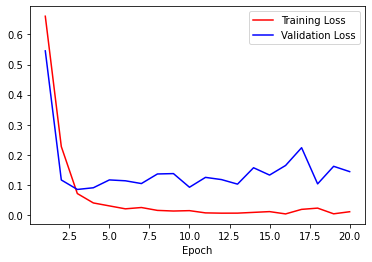

In [ ]:
train_and_vizualize_model(model, 20)

# **Choosing Loss Function & Optimizer**

Epoch 1/20
149/149 [==============================] - 6s 11ms/step - loss: 0.6913 - accuracy: 0.5412 - val_loss: 0.6993 - val_accuracy: 0.4519
Epoch 2/20
149/149 [==============================] - 1s 7ms/step - loss: 0.6893 - accuracy: 0.5421 - val_loss: 0.7001 - val_accuracy: 0.4519
Epoch 3/20
149/149 [==============================] - 1s 7ms/step - loss: 0.6884 - accuracy: 0.5421 - val_loss: 0.7023 - val_accuracy: 0.4519
Epoch 4/20
149/149 [==============================] - 1s 7ms/step - loss: 0.6873 - accuracy: 0.5421 - val_loss: 0.7032 - val_accuracy: 0.4519
Epoch 5/20
149/149 [==============================] - 1s 7ms/step - loss: 0.6864 - accuracy: 0.5421 - val_loss: 0.7035 - val_accuracy: 0.4519
Epoch 6/20
149/149 [==============================] - 1s 7ms/step - loss: 0.6855 - accuracy: 0.5421 - val_loss: 0.7028 - val_accuracy: 0.4519
Epoch 7/20
149/149 [==============================] - 1s 7ms/step - loss: 0.6844 - accuracy: 0.5421 - val_loss: 0.7053 - val_accuracy: 0.4519
Epoch

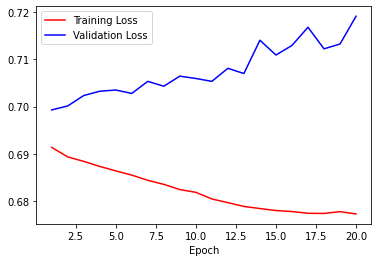

Loss Function: binary_crossentropy
Optimizer: SGD
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch 1/20
149/149 [==============================] - 3s 11ms/step - loss: 0.3759 - accuracy: 0.8053 - val_loss: 0.5168 - val_accuracy: 0.8761
Epoch 2/20
149/149 [==============================] - 1s 9ms/step - loss: 0.1537 - accuracy: 0.9597 - val_loss: 0.1178 - val_accuracy: 0.9663
Epoch 3/20
149/149 [==============================] - 1s 9ms/step - loss: 0.1159 - accuracy: 0.9738 - val_loss: 0.1465 - val_accuracy: 0.9671
Epoch 4/20
149/149 [==============================] - 1s 9ms/step - loss: 0.0961 - accuracy: 0.9774 - val_loss: 0.1412 - val_accuracy: 0.9705
Epoch 5/20
149/149 [==============================] - 1s 8ms/step - loss: 0.0684 - accuracy: 0.9844 - val_loss: 0.1618 - val_accuracy: 0.9680
Epoch 6/20
149/149 [==============================] - 1s 9ms/step - 

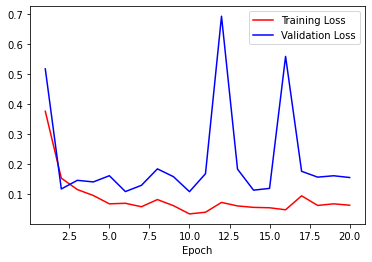

Loss Function: binary_crossentropy
Optimizer: RMSprop
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch 1/20
149/149 [==============================] - 4s 15ms/step - loss: 0.4876 - accuracy: 0.7520 - val_loss: 0.3021 - val_accuracy: 0.9157
Epoch 2/20
149/149 [==============================] - 2s 12ms/step - loss: 0.3120 - accuracy: 0.8821 - val_loss: 0.3011 - val_accuracy: 0.9089
Epoch 3/20
149/149 [==============================] - 2s 12ms/step - loss: 0.2887 - accuracy: 0.8918 - val_loss: 0.2838 - val_accuracy: 0.9098
Epoch 4/20
149/149 [==============================] - 2s 12ms/step - loss: 0.2887 - accuracy: 0.8933 - val_loss: 0.2656 - val_accuracy: 0.9191
Epoch 5/20
149/149 [==============================] - 2s 12ms/step - loss: 0.2387 - accuracy: 0.9243 - val_loss: 0.2485 - val_accuracy: 0.9292
Epoch 6/20
149/149 [==============================] - 2s 12m

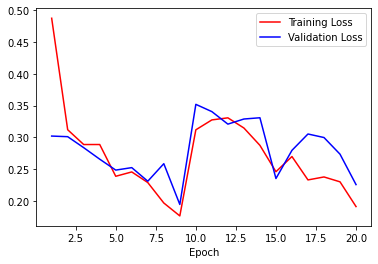

Loss Function: binary_crossentropy
Optimizer: Adam
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch 1/20
149/149 [==============================] - 4s 12ms/step - loss: 0.6931 - accuracy: 0.5138 - val_loss: 0.6919 - val_accuracy: 0.5295
Epoch 2/20
149/149 [==============================] - 1s 8ms/step - loss: 0.6930 - accuracy: 0.5197 - val_loss: 0.6919 - val_accuracy: 0.5295
Epoch 3/20
149/149 [==============================] - 1s 8ms/step - loss: 0.6931 - accuracy: 0.5227 - val_loss: 0.6919 - val_accuracy: 0.5236
Epoch 4/20
149/149 [==============================] - 1s 8ms/step - loss: 0.6929 - accuracy: 0.5225 - val_loss: 0.6920 - val_accuracy: 0.5202
Epoch 5/20
149/149 [==============================] - 1s 8ms/step - loss: 0.6929 - accuracy: 0.5258 - val_loss: 0.6920 - val_accuracy: 0.5177
Epoch 6/20
149/149 [==============================] - 1s 8ms/step -

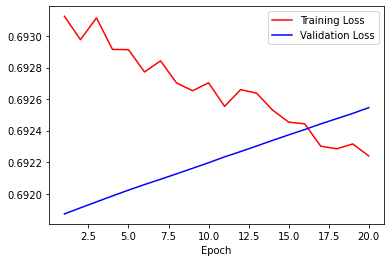

Loss Function: binary_crossentropy
Optimizer: Adadelta
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch 1/20
149/149 [==============================] - 3s 11ms/step - loss: 0.6922 - accuracy: 0.5412 - val_loss: 0.6946 - val_accuracy: 0.4519
Epoch 2/20
149/149 [==============================] - 1s 8ms/step - loss: 0.6913 - accuracy: 0.5419 - val_loss: 0.6958 - val_accuracy: 0.4519
Epoch 3/20
149/149 [==============================] - 1s 8ms/step - loss: 0.6905 - accuracy: 0.5421 - val_loss: 0.6967 - val_accuracy: 0.4519
Epoch 4/20
149/149 [==============================] - 1s 8ms/step - loss: 0.6901 - accuracy: 0.5421 - val_loss: 0.6974 - val_accuracy: 0.4519
Epoch 5/20
149/149 [==============================] - 1s 8ms/step - loss: 0.6898 - accuracy: 0.5421 - val_loss: 0.6981 - val_accuracy: 0.4519
Epoch 6/20
149/149 [==============================] - 1s 8ms/st

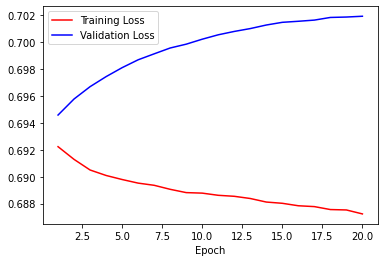

Loss Function: binary_crossentropy
Optimizer: Adagrad
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch 1/20
149/149 [==============================] - 4s 11ms/step - loss: 0.6713 - accuracy: 0.5503 - val_loss: 0.6770 - val_accuracy: 0.5826
Epoch 2/20
149/149 [==============================] - 1s 8ms/step - loss: 0.3546 - accuracy: 0.8696 - val_loss: 0.3108 - val_accuracy: 0.9216
Epoch 3/20
149/149 [==============================] - 1s 8ms/step - loss: 0.1816 - accuracy: 0.9414 - val_loss: 0.1509 - val_accuracy: 0.9503
Epoch 4/20
149/149 [==============================] - 1s 8ms/step - loss: 0.1207 - accuracy: 0.9593 - val_loss: 0.1292 - val_accuracy: 0.9545
Epoch 5/20
149/149 [==============================] - 1s 8ms/step - loss: 0.0987 - accuracy: 0.9654 - val_loss: 0.1195 - val_accuracy: 0.9562
Epoch 6/20
149/149 [==============================] - 1s 8ms/ste

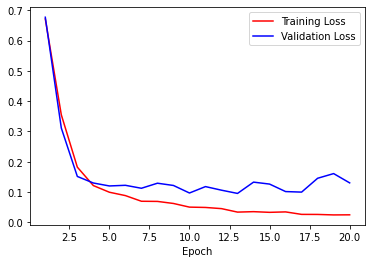

Loss Function: binary_crossentropy
Optimizer: Adamax
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch 1/20
149/149 [==============================] - 4s 13ms/step - loss: 0.5172 - accuracy: 0.7340 - val_loss: 0.4214 - val_accuracy: 0.8347
Epoch 2/20
149/149 [==============================] - 2s 10ms/step - loss: 0.2874 - accuracy: 0.9045 - val_loss: 0.2985 - val_accuracy: 0.8980
Epoch 3/20
149/149 [==============================] - 2s 10ms/step - loss: 0.2043 - accuracy: 0.9435 - val_loss: 1.2941 - val_accuracy: 0.5590
Epoch 4/20
149/149 [==============================] - 2s 11ms/step - loss: 0.2554 - accuracy: 0.9287 - val_loss: 0.2858 - val_accuracy: 0.9182
Epoch 5/20
149/149 [==============================] - 2s 10ms/step - loss: 0.2908 - accuracy: 0.9135 - val_loss: 0.2925 - val_accuracy: 0.9191
Epoch 6/20
149/149 [==============================] - 2s 10ms

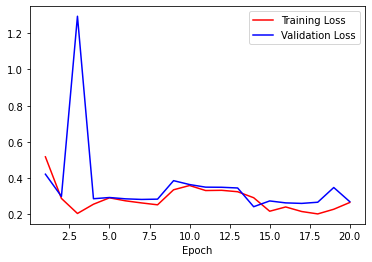

Loss Function: binary_crossentropy
Optimizer: Nadam
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch 1/20
149/149 [==============================] - 3s 12ms/step - loss: 0.6929 - accuracy: 0.5412 - val_loss: 0.6936 - val_accuracy: 0.4519
Epoch 2/20
149/149 [==============================] - 1s 8ms/step - loss: 0.6927 - accuracy: 0.5421 - val_loss: 0.6938 - val_accuracy: 0.4519
Epoch 3/20
149/149 [==============================] - 1s 8ms/step - loss: 0.6926 - accuracy: 0.5421 - val_loss: 0.6939 - val_accuracy: 0.4519
Epoch 4/20
149/149 [==============================] - 1s 8ms/step - loss: 0.6925 - accuracy: 0.5421 - val_loss: 0.6941 - val_accuracy: 0.4519
Epoch 5/20
149/149 [==============================] - 1s 8ms/step - loss: 0.6924 - accuracy: 0.5421 - val_loss: 0.6942 - val_accuracy: 0.4519
Epoch 6/20
149/149 [==============================] - 1s 8ms/step 

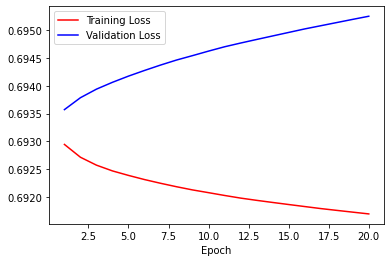

Loss Function: binary_crossentropy
Optimizer: Ftrl
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch 1/20
149/149 [==============================] - 3s 10ms/step - loss: 0.0000e+00 - accuracy: 0.5442 - val_loss: 0.0000e+00 - val_accuracy: 0.4519
Epoch 2/20
149/149 [==============================] - 1s 7ms/step - loss: 0.0000e+00 - accuracy: 0.5421 - val_loss: 0.0000e+00 - val_accuracy: 0.4519
Epoch 3/20
149/149 [==============================] - 1s 7ms/step - loss: 0.0000e+00 - accuracy: 0.5421 - val_loss: 0.0000e+00 - val_accuracy: 0.4519
Epoch 4/20
149/149 [==============================] - 1s 7ms/step - loss: 0.0000e+00 - accuracy: 0.5421 - val_loss: 0.0000e+00 - val_accuracy: 0.4519
Epoch 5/20
149/149 [==============================] - 1s 7ms/step - loss: 0.0000e+00 - accuracy: 0.5421 - val_loss: 0.0000e+00 - val_accuracy: 0.4519
Epoch 6/20
149/149 [=======

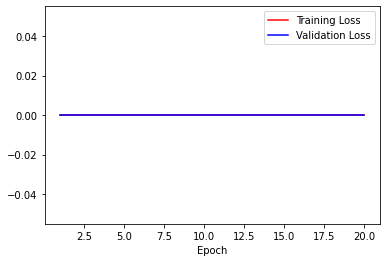

Loss Function: categorical_crossentropy
Optimizer: SGD
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch 1/20
149/149 [==============================] - 4s 13ms/step - loss: 0.0000e+00 - accuracy: 0.5438 - val_loss: 0.0000e+00 - val_accuracy: 0.4519
Epoch 2/20
149/149 [==============================] - 1s 9ms/step - loss: 0.0000e+00 - accuracy: 0.5421 - val_loss: 0.0000e+00 - val_accuracy: 0.4519
Epoch 3/20
149/149 [==============================] - 1s 9ms/step - loss: 0.0000e+00 - accuracy: 0.5421 - val_loss: 0.0000e+00 - val_accuracy: 0.4519
Epoch 4/20
149/149 [==============================] - 1s 9ms/step - loss: 0.0000e+00 - accuracy: 0.5421 - val_loss: 0.0000e+00 - val_accuracy: 0.4519
Epoch 5/20
149/149 [==============================] - 1s 9ms/step - loss: 0.0000e+00 - accuracy: 0.5421 - val_loss: 0.0000e+00 - val_accuracy: 0.4519
Epoch 6/20
149/149 [===

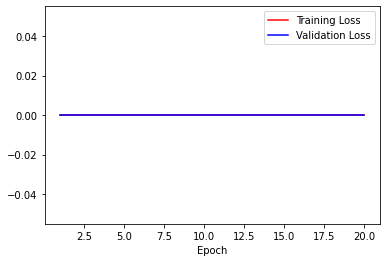

Loss Function: categorical_crossentropy
Optimizer: RMSprop
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch 1/20
149/149 [==============================] - 4s 15ms/step - loss: 0.0000e+00 - accuracy: 0.5429 - val_loss: 0.0000e+00 - val_accuracy: 0.4519
Epoch 2/20
149/149 [==============================] - 2s 12ms/step - loss: 0.0000e+00 - accuracy: 0.5421 - val_loss: 0.0000e+00 - val_accuracy: 0.4519
Epoch 3/20
149/149 [==============================] - 2s 12ms/step - loss: 0.0000e+00 - accuracy: 0.5421 - val_loss: 0.0000e+00 - val_accuracy: 0.4519
Epoch 4/20
149/149 [==============================] - 2s 12ms/step - loss: 0.0000e+00 - accuracy: 0.5421 - val_loss: 0.0000e+00 - val_accuracy: 0.4519
Epoch 5/20
149/149 [==============================] - 2s 12ms/step - loss: 0.0000e+00 - accuracy: 0.5421 - val_loss: 0.0000e+00 - val_accuracy: 0.4519
Epoch 6/20
149/

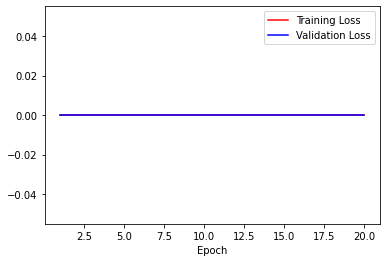

Loss Function: categorical_crossentropy
Optimizer: Adam
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch 1/20
149/149 [==============================] - 3s 10ms/step - loss: 0.0000e+00 - accuracy: 0.5033 - val_loss: 0.0000e+00 - val_accuracy: 0.4798
Epoch 2/20
149/149 [==============================] - 1s 8ms/step - loss: 0.0000e+00 - accuracy: 0.5140 - val_loss: 0.0000e+00 - val_accuracy: 0.4680
Epoch 3/20
149/149 [==============================] - 1s 8ms/step - loss: 0.0000e+00 - accuracy: 0.5250 - val_loss: 0.0000e+00 - val_accuracy: 0.4663
Epoch 4/20
149/149 [==============================] - 1s 8ms/step - loss: 0.0000e+00 - accuracy: 0.5269 - val_loss: 0.0000e+00 - val_accuracy: 0.4629
Epoch 5/20
149/149 [==============================] - 1s 8ms/step - loss: 0.0000e+00 - accuracy: 0.5347 - val_loss: 0.0000e+00 - val_accuracy: 0.4570
Epoch 6/20
149/149 [==

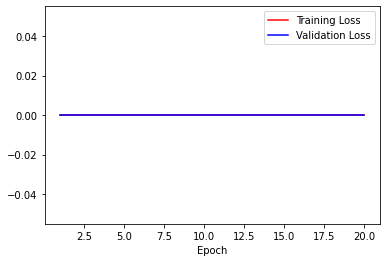

Loss Function: categorical_crossentropy
Optimizer: Adadelta
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch 1/20
149/149 [==============================] - 3s 10ms/step - loss: 0.0000e+00 - accuracy: 0.5414 - val_loss: 0.0000e+00 - val_accuracy: 0.4519
Epoch 2/20
149/149 [==============================] - 1s 8ms/step - loss: 0.0000e+00 - accuracy: 0.5421 - val_loss: 0.0000e+00 - val_accuracy: 0.4519
Epoch 3/20
149/149 [==============================] - 1s 8ms/step - loss: 0.0000e+00 - accuracy: 0.5421 - val_loss: 0.0000e+00 - val_accuracy: 0.4519
Epoch 4/20
149/149 [==============================] - 1s 8ms/step - loss: 0.0000e+00 - accuracy: 0.5421 - val_loss: 0.0000e+00 - val_accuracy: 0.4519
Epoch 5/20
149/149 [==============================] - 1s 8ms/step - loss: 0.0000e+00 - accuracy: 0.5421 - val_loss: 0.0000e+00 - val_accuracy: 0.4519
Epoch 6/20
149/149

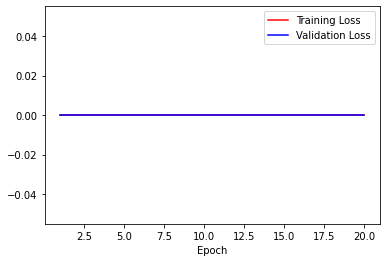

Loss Function: categorical_crossentropy
Optimizer: Adagrad
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch 1/20
149/149 [==============================] - 4s 12ms/step - loss: 0.0000e+00 - accuracy: 0.5431 - val_loss: 0.0000e+00 - val_accuracy: 0.4519
Epoch 2/20
149/149 [==============================] - 1s 8ms/step - loss: 0.0000e+00 - accuracy: 0.5421 - val_loss: 0.0000e+00 - val_accuracy: 0.4519
Epoch 3/20
149/149 [==============================] - 1s 8ms/step - loss: 0.0000e+00 - accuracy: 0.5421 - val_loss: 0.0000e+00 - val_accuracy: 0.4519
Epoch 4/20
149/149 [==============================] - 1s 8ms/step - loss: 0.0000e+00 - accuracy: 0.5421 - val_loss: 0.0000e+00 - val_accuracy: 0.4519
Epoch 5/20
149/149 [==============================] - 1s 8ms/step - loss: 0.0000e+00 - accuracy: 0.5421 - val_loss: 0.0000e+00 - val_accuracy: 0.4519
Epoch 6/20
149/149 

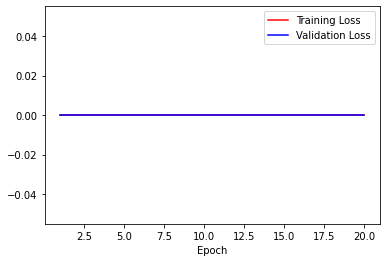

Loss Function: categorical_crossentropy
Optimizer: Adamax
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch 1/20
149/149 [==============================] - 4s 14ms/step - loss: 0.0000e+00 - accuracy: 0.5414 - val_loss: 0.0000e+00 - val_accuracy: 0.4519
Epoch 2/20
149/149 [==============================] - 2s 11ms/step - loss: 0.0000e+00 - accuracy: 0.5421 - val_loss: 0.0000e+00 - val_accuracy: 0.4519
Epoch 3/20
149/149 [==============================] - 2s 10ms/step - loss: 0.0000e+00 - accuracy: 0.5421 - val_loss: 0.0000e+00 - val_accuracy: 0.4519
Epoch 4/20
149/149 [==============================] - 2s 10ms/step - loss: 0.0000e+00 - accuracy: 0.5421 - val_loss: 0.0000e+00 - val_accuracy: 0.4519
Epoch 5/20
149/149 [==============================] - 2s 10ms/step - loss: 0.0000e+00 - accuracy: 0.5421 - val_loss: 0.0000e+00 - val_accuracy: 0.4519
Epoch 6/20
149/1

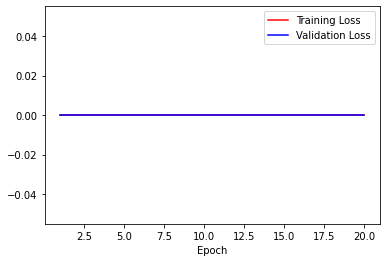

Loss Function: categorical_crossentropy
Optimizer: Nadam
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch 1/20
149/149 [==============================] - 3s 11ms/step - loss: 0.0000e+00 - accuracy: 0.5412 - val_loss: 0.0000e+00 - val_accuracy: 0.4519
Epoch 2/20
149/149 [==============================] - 1s 8ms/step - loss: 0.0000e+00 - accuracy: 0.5421 - val_loss: 0.0000e+00 - val_accuracy: 0.4519
Epoch 3/20
149/149 [==============================] - 1s 8ms/step - loss: 0.0000e+00 - accuracy: 0.5421 - val_loss: 0.0000e+00 - val_accuracy: 0.4519
Epoch 4/20
149/149 [==============================] - 1s 8ms/step - loss: 0.0000e+00 - accuracy: 0.5421 - val_loss: 0.0000e+00 - val_accuracy: 0.4519
Epoch 5/20
149/149 [==============================] - 1s 8ms/step - loss: 0.0000e+00 - accuracy: 0.5421 - val_loss: 0.0000e+00 - val_accuracy: 0.4519
Epoch 6/20
149/149 [=

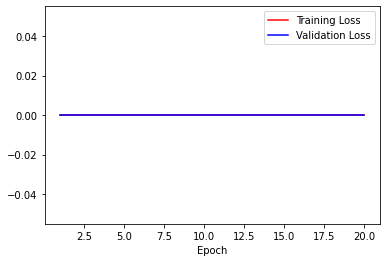

Loss Function: categorical_crossentropy
Optimizer: Ftrl
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch 1/20
149/149 [==============================] - 3s 11ms/step - loss: 0.8166 - accuracy: 0.5412 - val_loss: 0.8823 - val_accuracy: 0.4519
Epoch 2/20
149/149 [==============================] - 1s 8ms/step - loss: 0.8159 - accuracy: 0.5421 - val_loss: 0.8835 - val_accuracy: 0.4519
Epoch 3/20
149/149 [==============================] - 1s 8ms/step - loss: 0.8155 - accuracy: 0.5421 - val_loss: 0.8841 - val_accuracy: 0.4519
Epoch 4/20
149/149 [==============================] - 1s 8ms/step - loss: 0.8152 - accuracy: 0.5421 - val_loss: 0.8849 - val_accuracy: 0.4519
Epoch 5/20
149/149 [==============================] - 1s 8ms/step - loss: 0.8150 - accuracy: 0.5421 - val_loss: 0.8853 - val_accuracy: 0.4519
Epoch 6/20
149/149 [==============================] - 1s 8ms/s

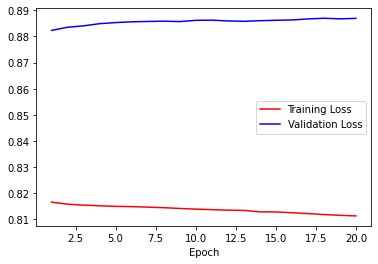

Loss Function: poisson
Optimizer: SGD
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch 1/20
149/149 [==============================] - 3s 11ms/step - loss: 0.6702 - accuracy: 0.7760 - val_loss: 0.6583 - val_accuracy: 0.9494
Epoch 2/20
149/149 [==============================] - 1s 9ms/step - loss: 0.5271 - accuracy: 0.9606 - val_loss: 0.5963 - val_accuracy: 0.9578
Epoch 3/20
149/149 [==============================] - 1s 9ms/step - loss: 0.5202 - accuracy: 0.9707 - val_loss: 0.6008 - val_accuracy: 0.9705
Epoch 4/20
149/149 [==============================] - 1s 9ms/step - loss: 0.4979 - accuracy: 0.9791 - val_loss: 0.8348 - val_accuracy: 0.9241
Epoch 5/20
149/149 [==============================] - 1s 9ms/step - loss: 0.4933 - accuracy: 0.9819 - val_loss: 0.5968 - val_accuracy: 0.9730
Epoch 6/20
149/149 [==============================] - 1s 9ms/step - loss: 0.4898

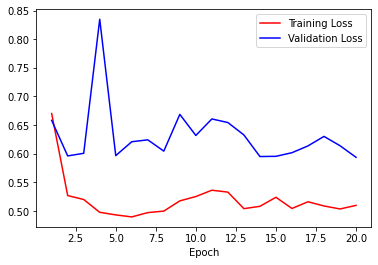

Loss Function: poisson
Optimizer: RMSprop
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch 1/20
149/149 [==============================] - 4s 15ms/step - loss: 0.7752 - accuracy: 0.6836 - val_loss: 0.8366 - val_accuracy: 0.6838
Epoch 2/20
149/149 [==============================] - 2s 12ms/step - loss: 0.7528 - accuracy: 0.7334 - val_loss: 0.8301 - val_accuracy: 0.6830
Epoch 3/20
149/149 [==============================] - 2s 12ms/step - loss: 0.7516 - accuracy: 0.7174 - val_loss: 0.8327 - val_accuracy: 0.6889
Epoch 4/20
149/149 [==============================] - 2s 12ms/step - loss: 0.6565 - accuracy: 0.8477 - val_loss: 0.7022 - val_accuracy: 0.9073
Epoch 5/20
149/149 [==============================] - 2s 13ms/step - loss: 0.5916 - accuracy: 0.9236 - val_loss: 0.6908 - val_accuracy: 0.9191
Epoch 6/20
149/149 [==============================] - 2s 13ms/step - los

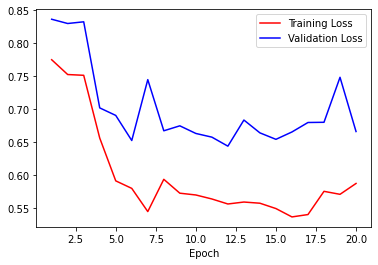

Loss Function: poisson
Optimizer: Adam
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch 1/20
149/149 [==============================] - 3s 11ms/step - loss: 0.8175 - accuracy: 0.4948 - val_loss: 0.8800 - val_accuracy: 0.4663
Epoch 2/20
149/149 [==============================] - 1s 8ms/step - loss: 0.8174 - accuracy: 0.5071 - val_loss: 0.8801 - val_accuracy: 0.4637
Epoch 3/20
149/149 [==============================] - 1s 8ms/step - loss: 0.8173 - accuracy: 0.5079 - val_loss: 0.8801 - val_accuracy: 0.4604
Epoch 4/20
149/149 [==============================] - 1s 8ms/step - loss: 0.8174 - accuracy: 0.5092 - val_loss: 0.8801 - val_accuracy: 0.4587
Epoch 5/20
149/149 [==============================] - 1s 8ms/step - loss: 0.8174 - accuracy: 0.5060 - val_loss: 0.8801 - val_accuracy: 0.4587
Epoch 6/20
149/149 [==============================] - 1s 8ms/step - loss: 0.817

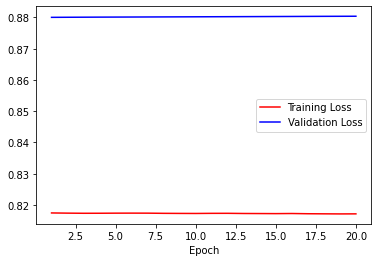

Loss Function: poisson
Optimizer: Adadelta
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch 1/20
149/149 [==============================] - 3s 11ms/step - loss: 0.8171 - accuracy: 0.5263 - val_loss: 0.8803 - val_accuracy: 0.4511
Epoch 2/20
149/149 [==============================] - 1s 8ms/step - loss: 0.8167 - accuracy: 0.5414 - val_loss: 0.8807 - val_accuracy: 0.4519
Epoch 3/20
149/149 [==============================] - 1s 8ms/step - loss: 0.8164 - accuracy: 0.5421 - val_loss: 0.8811 - val_accuracy: 0.4519
Epoch 4/20
149/149 [==============================] - 1s 8ms/step - loss: 0.8162 - accuracy: 0.5421 - val_loss: 0.8815 - val_accuracy: 0.4519
Epoch 5/20
149/149 [==============================] - 1s 8ms/step - loss: 0.8160 - accuracy: 0.5421 - val_loss: 0.8818 - val_accuracy: 0.4519
Epoch 6/20
149/149 [==============================] - 1s 8ms/step - loss: 0

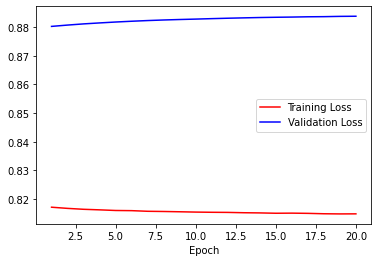

Loss Function: poisson
Optimizer: Adagrad
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch 1/20
149/149 [==============================] - 3s 11ms/step - loss: 0.7923 - accuracy: 0.5746 - val_loss: 0.8406 - val_accuracy: 0.5683
Epoch 2/20
149/149 [==============================] - 1s 8ms/step - loss: 0.6184 - accuracy: 0.8287 - val_loss: 0.6953 - val_accuracy: 0.8794
Epoch 3/20
149/149 [==============================] - 1s 8ms/step - loss: 0.5619 - accuracy: 0.9264 - val_loss: 0.6511 - val_accuracy: 0.9342
Epoch 4/20
149/149 [==============================] - 1s 8ms/step - loss: 0.5344 - accuracy: 0.9390 - val_loss: 0.6060 - val_accuracy: 0.9503
Epoch 5/20
149/149 [==============================] - 1s 8ms/step - loss: 0.5165 - accuracy: 0.9511 - val_loss: 0.5983 - val_accuracy: 0.9621
Epoch 6/20
149/149 [==============================] - 1s 8ms/step - loss: 0.

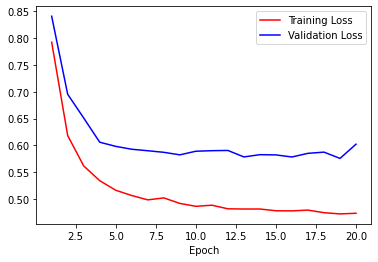

Loss Function: poisson
Optimizer: Adamax
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch 1/20
149/149 [==============================] - 4s 13ms/step - loss: 0.7737 - accuracy: 0.6473 - val_loss: 0.7913 - val_accuracy: 0.8550
Epoch 2/20
149/149 [==============================] - 2s 10ms/step - loss: 0.6848 - accuracy: 0.8564 - val_loss: 0.7608 - val_accuracy: 0.8465
Epoch 3/20
149/149 [==============================] - 2s 10ms/step - loss: 0.6942 - accuracy: 0.8313 - val_loss: 0.7933 - val_accuracy: 0.7867
Epoch 4/20
149/149 [==============================] - 2s 10ms/step - loss: 0.6797 - accuracy: 0.8150 - val_loss: 0.7888 - val_accuracy: 0.7867
Epoch 5/20
149/149 [==============================] - 2s 10ms/step - loss: 0.7057 - accuracy: 0.7916 - val_loss: 0.7796 - val_accuracy: 0.7909
Epoch 6/20
149/149 [==============================] - 2s 10ms/step - loss

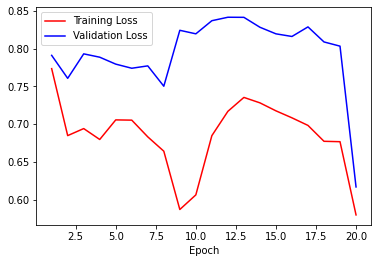

Loss Function: poisson
Optimizer: Nadam
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch 1/20
149/149 [==============================] - 3s 11ms/step - loss: 0.8173 - accuracy: 0.5404 - val_loss: 0.8800 - val_accuracy: 0.4519
Epoch 2/20
149/149 [==============================] - 1s 8ms/step - loss: 0.8172 - accuracy: 0.5421 - val_loss: 0.8801 - val_accuracy: 0.4519
Epoch 3/20
149/149 [==============================] - 1s 8ms/step - loss: 0.8172 - accuracy: 0.5421 - val_loss: 0.8802 - val_accuracy: 0.4519
Epoch 4/20
149/149 [==============================] - 1s 8ms/step - loss: 0.8171 - accuracy: 0.5421 - val_loss: 0.8803 - val_accuracy: 0.4519
Epoch 5/20
149/149 [==============================] - 1s 8ms/step - loss: 0.8171 - accuracy: 0.5421 - val_loss: 0.8803 - val_accuracy: 0.4519
Epoch 6/20
149/149 [==============================] - 1s 8ms/step - loss: 0.81

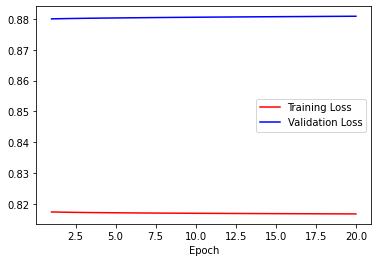

Loss Function: poisson
Optimizer: Ftrl
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch 1/20
149/149 [==============================] - 3s 10ms/step - loss: 0.2241 - accuracy: 0.4607 - val_loss: 0.1730 - val_accuracy: 0.5481
Epoch 2/20
149/149 [==============================] - 1s 8ms/step - loss: 0.0969 - accuracy: 0.4579 - val_loss: 0.0732 - val_accuracy: 0.5481
Epoch 3/20
149/149 [==============================] - 1s 8ms/step - loss: 0.0438 - accuracy: 0.4579 - val_loss: 0.0373 - val_accuracy: 0.5481
Epoch 4/20
149/149 [==============================] - 1s 8ms/step - loss: 0.0246 - accuracy: 0.4579 - val_loss: 0.0233 - val_accuracy: 0.5481
Epoch 5/20
149/149 [==============================] - 1s 8ms/step - loss: 0.0163 - accuracy: 0.4579 - val_loss: 0.0164 - val_accuracy: 0.5481
Epoch 6/20
149/149 [==============================] - 1s 8ms/step - loss: 0.012

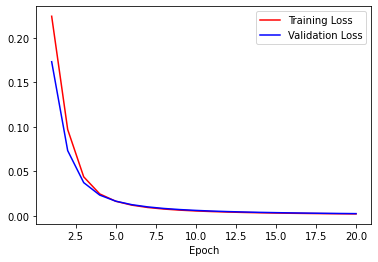

Loss Function: kl_divergence
Optimizer: SGD
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch 1/20
149/149 [==============================] - 4s 12ms/step - loss: 0.0070 - accuracy: 0.4586 - val_loss: 3.2133e-06 - val_accuracy: 0.5481
Epoch 2/20
149/149 [==============================] - 1s 9ms/step - loss: -2.3310e-07 - accuracy: 0.4579 - val_loss: -6.6311e-07 - val_accuracy: 0.5481
Epoch 3/20
149/149 [==============================] - 1s 9ms/step - loss: -8.6244e-07 - accuracy: 0.4579 - val_loss: -7.2844e-07 - val_accuracy: 0.5481
Epoch 4/20
149/149 [==============================] - 1s 9ms/step - loss: -8.7368e-07 - accuracy: 0.4579 - val_loss: -7.2844e-07 - val_accuracy: 0.5481
Epoch 5/20
149/149 [==============================] - 1s 9ms/step - loss: -8.7373e-07 - accuracy: 0.4579 - val_loss: -7.2844e-07 - val_accuracy: 0.5481
Epoch 6/20
149/149 [==========

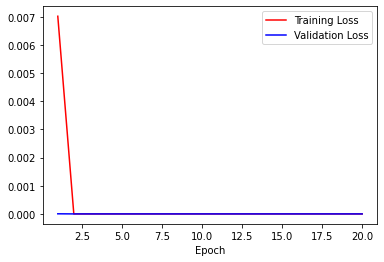

Loss Function: kl_divergence
Optimizer: RMSprop
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch 1/20
149/149 [==============================] - 4s 15ms/step - loss: 0.0310 - accuracy: 0.4588 - val_loss: 1.8595e-04 - val_accuracy: 0.5481
Epoch 2/20
149/149 [==============================] - 2s 13ms/step - loss: 1.0642e-04 - accuracy: 0.4579 - val_loss: 8.8772e-05 - val_accuracy: 0.5481
Epoch 3/20
149/149 [==============================] - 2s 13ms/step - loss: 5.7862e-05 - accuracy: 0.4579 - val_loss: 5.4779e-05 - val_accuracy: 0.5481
Epoch 4/20
149/149 [==============================] - 2s 13ms/step - loss: 3.7850e-05 - accuracy: 0.4579 - val_loss: 3.7964e-05 - val_accuracy: 0.5481
Epoch 5/20
149/149 [==============================] - 2s 13ms/step - loss: 2.7071e-05 - accuracy: 0.4579 - val_loss: 2.8153e-05 - val_accuracy: 0.5481
Epoch 6/20
149/149 [==========

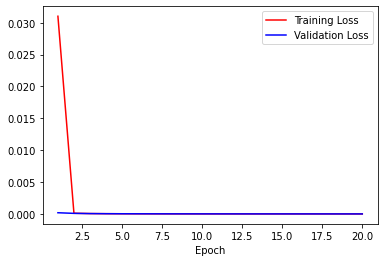

Loss Function: kl_divergence
Optimizer: Adam
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch 1/20
149/149 [==============================] - 3s 11ms/step - loss: 0.3177 - accuracy: 0.4788 - val_loss: 0.3796 - val_accuracy: 0.5346
Epoch 2/20
149/149 [==============================] - 1s 8ms/step - loss: 0.3166 - accuracy: 0.4832 - val_loss: 0.3783 - val_accuracy: 0.5438
Epoch 3/20
149/149 [==============================] - 1s 8ms/step - loss: 0.3155 - accuracy: 0.4811 - val_loss: 0.3769 - val_accuracy: 0.5405
Epoch 4/20
149/149 [==============================] - 1s 8ms/step - loss: 0.3143 - accuracy: 0.4687 - val_loss: 0.3755 - val_accuracy: 0.5422
Epoch 5/20
149/149 [==============================] - 1s 8ms/step - loss: 0.3131 - accuracy: 0.4664 - val_loss: 0.3740 - val_accuracy: 0.5455
Epoch 6/20
149/149 [==============================] - 1s 8ms/step - loss:

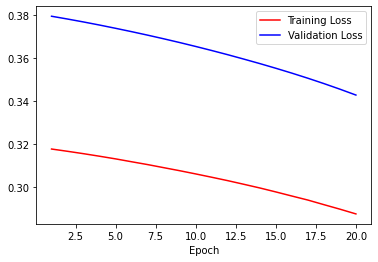

Loss Function: kl_divergence
Optimizer: Adadelta
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch 1/20
149/149 [==============================] - 3s 10ms/step - loss: 0.2963 - accuracy: 0.4583 - val_loss: 0.3322 - val_accuracy: 0.5481
Epoch 2/20
149/149 [==============================] - 1s 8ms/step - loss: 0.2633 - accuracy: 0.4579 - val_loss: 0.2989 - val_accuracy: 0.5481
Epoch 3/20
149/149 [==============================] - 1s 8ms/step - loss: 0.2368 - accuracy: 0.4579 - val_loss: 0.2679 - val_accuracy: 0.5481
Epoch 4/20
149/149 [==============================] - 1s 8ms/step - loss: 0.2099 - accuracy: 0.4579 - val_loss: 0.2342 - val_accuracy: 0.5481
Epoch 5/20
149/149 [==============================] - 1s 8ms/step - loss: 0.1797 - accuracy: 0.4579 - val_loss: 0.1955 - val_accuracy: 0.5481
Epoch 6/20
149/149 [==============================] - 1s 8ms/step - l

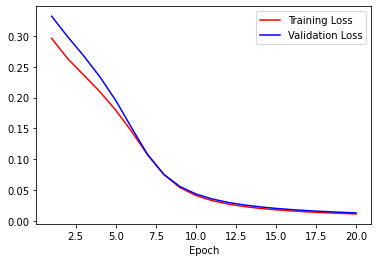

Loss Function: kl_divergence
Optimizer: Adagrad
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch 1/20
149/149 [==============================] - 3s 11ms/step - loss: 0.0429 - accuracy: 0.4586 - val_loss: 4.1850e-04 - val_accuracy: 0.5481
Epoch 2/20
149/149 [==============================] - 1s 9ms/step - loss: 2.4693e-04 - accuracy: 0.4579 - val_loss: 2.1788e-04 - val_accuracy: 0.5481
Epoch 3/20
149/149 [==============================] - 1s 9ms/step - loss: 1.4978e-04 - accuracy: 0.4579 - val_loss: 1.4961e-04 - val_accuracy: 0.5481
Epoch 4/20
149/149 [==============================] - 1s 9ms/step - loss: 1.0840e-04 - accuracy: 0.4579 - val_loss: 1.1335e-04 - val_accuracy: 0.5481
Epoch 5/20
149/149 [==============================] - 1s 9ms/step - loss: 8.4042e-05 - accuracy: 0.4579 - val_loss: 8.9855e-05 - val_accuracy: 0.5481
Epoch 6/20
149/149 [==============

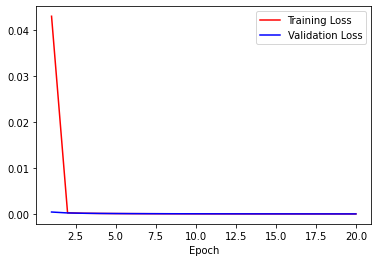

Loss Function: kl_divergence
Optimizer: Adamax
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch 1/20
149/149 [==============================] - 4s 15ms/step - loss: 0.0235 - accuracy: 0.4581 - val_loss: 1.6135e-04 - val_accuracy: 0.5481
Epoch 2/20
149/149 [==============================] - 2s 10ms/step - loss: 9.0115e-05 - accuracy: 0.4579 - val_loss: 7.4019e-05 - val_accuracy: 0.5481
Epoch 3/20
149/149 [==============================] - 2s 10ms/step - loss: 4.7901e-05 - accuracy: 0.4579 - val_loss: 4.4999e-05 - val_accuracy: 0.5481
Epoch 4/20
149/149 [==============================] - 2s 11ms/step - loss: 3.0851e-05 - accuracy: 0.4579 - val_loss: 3.0792e-05 - val_accuracy: 0.5481
Epoch 5/20
149/149 [==============================] - 2s 10ms/step - loss: 2.1789e-05 - accuracy: 0.4579 - val_loss: 2.2587e-05 - val_accuracy: 0.5481
Epoch 6/20
149/149 [===========

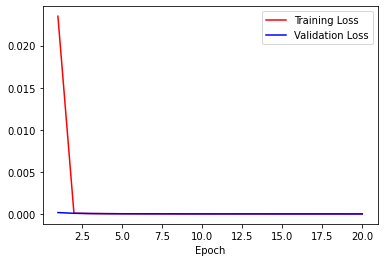

Loss Function: kl_divergence
Optimizer: Nadam
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch 1/20
149/149 [==============================] - 3s 11ms/step - loss: 0.3144 - accuracy: 0.4581 - val_loss: 0.3742 - val_accuracy: 0.5481
Epoch 2/20
149/149 [==============================] - 1s 8ms/step - loss: 0.3115 - accuracy: 0.4579 - val_loss: 0.3715 - val_accuracy: 0.5481
Epoch 3/20
149/149 [==============================] - 1s 8ms/step - loss: 0.3096 - accuracy: 0.4579 - val_loss: 0.3695 - val_accuracy: 0.5481
Epoch 4/20
149/149 [==============================] - 1s 8ms/step - loss: 0.3080 - accuracy: 0.4579 - val_loss: 0.3678 - val_accuracy: 0.5481
Epoch 5/20
149/149 [==============================] - 1s 8ms/step - loss: 0.3067 - accuracy: 0.4579 - val_loss: 0.3663 - val_accuracy: 0.5481
Epoch 6/20
149/149 [==============================] - 1s 8ms/step - loss

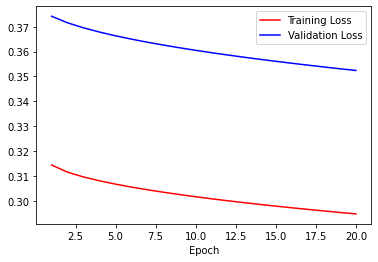

Loss Function: kl_divergence
Optimizer: Ftrl
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch 1/20
149/149 [==============================] - 3s 12ms/step - loss: 1.0410 - accuracy: 0.5429 - val_loss: 0.9541 - val_accuracy: 0.4519
Epoch 2/20
149/149 [==============================] - 1s 8ms/step - loss: 1.0389 - accuracy: 0.5421 - val_loss: 0.9565 - val_accuracy: 0.4519
Epoch 3/20
149/149 [==============================] - 1s 9ms/step - loss: 1.0367 - accuracy: 0.5421 - val_loss: 0.9588 - val_accuracy: 0.4519
Epoch 4/20
149/149 [==============================] - 1s 8ms/step - loss: 1.0346 - accuracy: 0.5421 - val_loss: 0.9614 - val_accuracy: 0.4519
Epoch 5/20
149/149 [==============================] - 1s 8ms/step - loss: 1.0324 - accuracy: 0.5421 - val_loss: 0.9641 - val_accuracy: 0.4519
Epoch 6/20
149/149 [==============================] - 1s 8ms/step - loss:

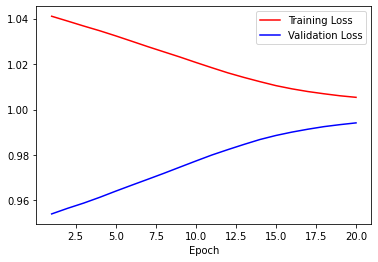

Loss Function: hinge
Optimizer: SGD
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch 1/20
149/149 [==============================] - 4s 12ms/step - loss: 0.8230 - accuracy: 0.7349 - val_loss: 0.8397 - val_accuracy: 0.6046
Epoch 2/20
149/149 [==============================] - 1s 9ms/step - loss: 0.7322 - accuracy: 0.8104 - val_loss: 0.8061 - val_accuracy: 0.6459
Epoch 3/20
149/149 [==============================] - 1s 9ms/step - loss: 0.8389 - accuracy: 0.7032 - val_loss: 0.8128 - val_accuracy: 0.6391
Epoch 4/20
149/149 [==============================] - 1s 10ms/step - loss: 0.8399 - accuracy: 0.7022 - val_loss: 0.8137 - val_accuracy: 0.6383
Epoch 5/20
149/149 [==============================] - 1s 9ms/step - loss: 0.6965 - accuracy: 0.8456 - val_loss: 0.6602 - val_accuracy: 0.7917
Epoch 6/20
149/149 [==============================] - 1s 9ms/step - loss: 0.6821 

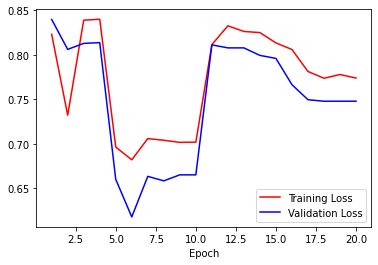

Loss Function: hinge
Optimizer: RMSprop
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch 1/20
149/149 [==============================] - 4s 16ms/step - loss: 0.9094 - accuracy: 0.6454 - val_loss: 0.8311 - val_accuracy: 0.6214
Epoch 2/20
149/149 [==============================] - 2s 13ms/step - loss: 0.8555 - accuracy: 0.6870 - val_loss: 0.8307 - val_accuracy: 0.6214
Epoch 3/20
149/149 [==============================] - 2s 13ms/step - loss: 0.8483 - accuracy: 0.6939 - val_loss: 0.8298 - val_accuracy: 0.6223
Epoch 4/20
149/149 [==============================] - 2s 13ms/step - loss: 0.8453 - accuracy: 0.6969 - val_loss: 0.8272 - val_accuracy: 0.6248
Epoch 5/20
149/149 [==============================] - 2s 13ms/step - loss: 0.8484 - accuracy: 0.6937 - val_loss: 0.8272 - val_accuracy: 0.6248
Epoch 6/20
149/149 [==============================] - 2s 13ms/step - loss:

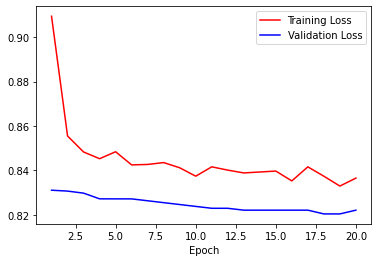

Loss Function: hinge
Optimizer: Adam
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch 1/20
149/149 [==============================] - 3s 13ms/step - loss: 1.0420 - accuracy: 0.5058 - val_loss: 0.9520 - val_accuracy: 0.4789
Epoch 2/20
149/149 [==============================] - 1s 8ms/step - loss: 1.0421 - accuracy: 0.5026 - val_loss: 0.9520 - val_accuracy: 0.4755
Epoch 3/20
149/149 [==============================] - 1s 9ms/step - loss: 1.0420 - accuracy: 0.5024 - val_loss: 0.9520 - val_accuracy: 0.4705
Epoch 4/20
149/149 [==============================] - 1s 9ms/step - loss: 1.0420 - accuracy: 0.5225 - val_loss: 0.9520 - val_accuracy: 0.4654
Epoch 5/20
149/149 [==============================] - 1s 9ms/step - loss: 1.0419 - accuracy: 0.5233 - val_loss: 0.9521 - val_accuracy: 0.4654
Epoch 6/20
149/149 [==============================] - 1s 9ms/step - loss: 1.0419 

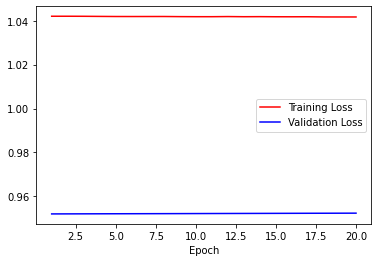

Loss Function: hinge
Optimizer: Adadelta
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch 1/20
149/149 [==============================] - 3s 12ms/step - loss: 1.0418 - accuracy: 0.5235 - val_loss: 0.9529 - val_accuracy: 0.4519
Epoch 2/20
149/149 [==============================] - 1s 8ms/step - loss: 1.0412 - accuracy: 0.5421 - val_loss: 0.9535 - val_accuracy: 0.4519
Epoch 3/20
149/149 [==============================] - 1s 9ms/step - loss: 1.0407 - accuracy: 0.5421 - val_loss: 0.9540 - val_accuracy: 0.4519
Epoch 4/20
149/149 [==============================] - 1s 9ms/step - loss: 1.0402 - accuracy: 0.5421 - val_loss: 0.9545 - val_accuracy: 0.4519
Epoch 5/20
149/149 [==============================] - 1s 9ms/step - loss: 1.0398 - accuracy: 0.5421 - val_loss: 0.9550 - val_accuracy: 0.4519
Epoch 6/20
149/149 [==============================] - 1s 9ms/step - loss: 1.0

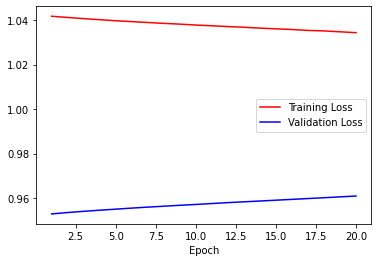

Loss Function: hinge
Optimizer: Adagrad
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch 1/20
149/149 [==============================] - 3s 12ms/step - loss: 1.0060 - accuracy: 0.5471 - val_loss: 0.9237 - val_accuracy: 0.5683
Epoch 2/20
149/149 [==============================] - 1s 9ms/step - loss: 0.8504 - accuracy: 0.7477 - val_loss: 0.7401 - val_accuracy: 0.8061
Epoch 3/20
149/149 [==============================] - 1s 9ms/step - loss: 0.7273 - accuracy: 0.8642 - val_loss: 0.6462 - val_accuracy: 0.8398
Epoch 4/20
149/149 [==============================] - 1s 9ms/step - loss: 0.6873 - accuracy: 0.8741 - val_loss: 0.6187 - val_accuracy: 0.8508
Epoch 5/20
149/149 [==============================] - 1s 9ms/step - loss: 0.6693 - accuracy: 0.8831 - val_loss: 0.6138 - val_accuracy: 0.8491
Epoch 6/20
149/149 [==============================] - 1s 9ms/step - loss: 0.67

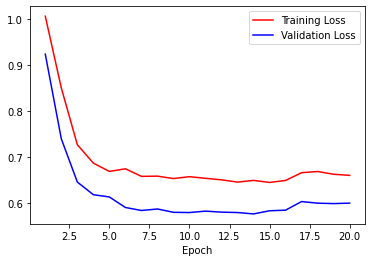

Loss Function: hinge
Optimizer: Adamax
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch 1/20
149/149 [==============================] - 4s 14ms/step - loss: 1.0135 - accuracy: 0.5402 - val_loss: 1.0000 - val_accuracy: 0.4519
Epoch 2/20
149/149 [==============================] - 2s 11ms/step - loss: 1.0000 - accuracy: 0.5421 - val_loss: 1.0000 - val_accuracy: 0.4519
Epoch 3/20
149/149 [==============================] - 2s 12ms/step - loss: 1.0000 - accuracy: 0.5421 - val_loss: 1.0000 - val_accuracy: 0.4519
Epoch 4/20
149/149 [==============================] - 2s 11ms/step - loss: 1.0000 - accuracy: 0.5421 - val_loss: 1.0000 - val_accuracy: 0.4519
Epoch 5/20
149/149 [==============================] - 2s 11ms/step - loss: 1.0000 - accuracy: 0.5421 - val_loss: 1.0000 - val_accuracy: 0.4519
Epoch 6/20
149/149 [==============================] - 2s 11ms/step - loss: 

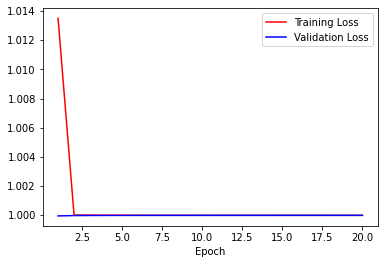

Loss Function: hinge
Optimizer: Nadam
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch 1/20
149/149 [==============================] - 3s 12ms/step - loss: 1.0420 - accuracy: 0.5387 - val_loss: 0.9521 - val_accuracy: 0.4519
Epoch 2/20
149/149 [==============================] - 1s 9ms/step - loss: 1.0419 - accuracy: 0.5421 - val_loss: 0.9522 - val_accuracy: 0.4519
Epoch 3/20
149/149 [==============================] - 1s 9ms/step - loss: 1.0418 - accuracy: 0.5421 - val_loss: 0.9522 - val_accuracy: 0.4519
Epoch 4/20
149/149 [==============================] - 1s 9ms/step - loss: 1.0418 - accuracy: 0.5421 - val_loss: 0.9523 - val_accuracy: 0.4519
Epoch 5/20
149/149 [==============================] - 1s 9ms/step - loss: 1.0417 - accuracy: 0.5421 - val_loss: 0.9524 - val_accuracy: 0.4519
Epoch 6/20
149/149 [==============================] - 1s 9ms/step - loss: 1.0417

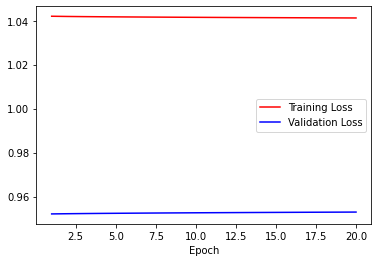

Loss Function: hinge
Optimizer: Ftrl
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch 1/20
149/149 [==============================] - 3s 11ms/step - loss: 1.1843 - accuracy: 0.5421 - val_loss: 1.0039 - val_accuracy: 0.4519
Epoch 2/20
149/149 [==============================] - 1s 8ms/step - loss: 1.0511 - accuracy: 0.5421 - val_loss: 0.9904 - val_accuracy: 0.4519
Epoch 3/20
149/149 [==============================] - 1s 8ms/step - loss: 1.0217 - accuracy: 0.5421 - val_loss: 0.9917 - val_accuracy: 0.4519
Epoch 4/20
149/149 [==============================] - 1s 8ms/step - loss: 1.0130 - accuracy: 0.5421 - val_loss: 0.9933 - val_accuracy: 0.4519
Epoch 5/20
149/149 [==============================] - 1s 8ms/step - loss: 1.0091 - accuracy: 0.5421 - val_loss: 0.9944 - val_accuracy: 0.4519
Epoch 6/20
149/149 [==============================] - 1s 8ms/step - loss: 1.0071 

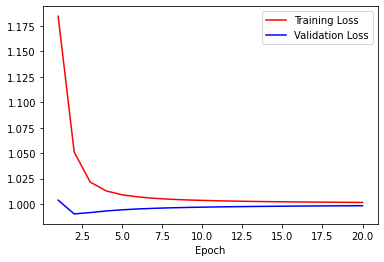

Loss Function: squared_hinge
Optimizer: SGD
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch 1/20
149/149 [==============================] - 4s 13ms/step - loss: 1.0119 - accuracy: 0.5398 - val_loss: 1.0000 - val_accuracy: 0.4519
Epoch 2/20
149/149 [==============================] - 1s 10ms/step - loss: 1.0000 - accuracy: 0.5421 - val_loss: 1.0000 - val_accuracy: 0.4519
Epoch 3/20
149/149 [==============================] - 1s 10ms/step - loss: 1.0000 - accuracy: 0.5421 - val_loss: 1.0000 - val_accuracy: 0.4519
Epoch 4/20
149/149 [==============================] - 1s 10ms/step - loss: 1.0000 - accuracy: 0.5421 - val_loss: 1.0000 - val_accuracy: 0.4519
Epoch 5/20
149/149 [==============================] - 1s 10ms/step - loss: 1.0000 - accuracy: 0.5421 - val_loss: 1.0000 - val_accuracy: 0.4519
Epoch 6/20
149/149 [==============================] - 1s 10ms/step - l

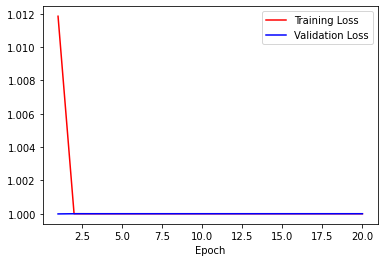

Loss Function: squared_hinge
Optimizer: RMSprop
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch 1/20
149/149 [==============================] - 4s 16ms/step - loss: 1.0296 - accuracy: 0.5427 - val_loss: 0.9999 - val_accuracy: 0.4519
Epoch 2/20
149/149 [==============================] - 2s 13ms/step - loss: 1.0000 - accuracy: 0.5421 - val_loss: 1.0000 - val_accuracy: 0.4519
Epoch 3/20
149/149 [==============================] - 2s 13ms/step - loss: 1.0000 - accuracy: 0.5421 - val_loss: 1.0000 - val_accuracy: 0.4519
Epoch 4/20
149/149 [==============================] - 2s 13ms/step - loss: 1.0000 - accuracy: 0.5421 - val_loss: 1.0000 - val_accuracy: 0.4519
Epoch 5/20
149/149 [==============================] - 2s 13ms/step - loss: 1.0000 - accuracy: 0.5421 - val_loss: 1.0000 - val_accuracy: 0.4519
Epoch 6/20
149/149 [==============================] - 2s 13ms/step

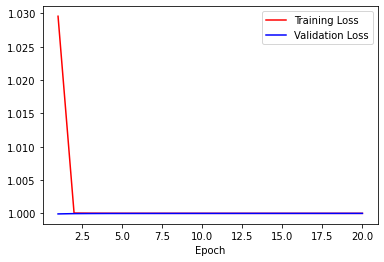

Loss Function: squared_hinge
Optimizer: Adam
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch 1/20
149/149 [==============================] - 3s 11ms/step - loss: 1.3301 - accuracy: 0.5050 - val_loss: 1.1497 - val_accuracy: 0.4705
Epoch 2/20
149/149 [==============================] - 1s 9ms/step - loss: 1.3289 - accuracy: 0.5071 - val_loss: 1.1487 - val_accuracy: 0.4587
Epoch 3/20
149/149 [==============================] - 1s 9ms/step - loss: 1.3276 - accuracy: 0.5180 - val_loss: 1.1476 - val_accuracy: 0.4595
Epoch 4/20
149/149 [==============================] - 1s 9ms/step - loss: 1.3261 - accuracy: 0.5254 - val_loss: 1.1465 - val_accuracy: 0.4562
Epoch 5/20
149/149 [==============================] - 1s 9ms/step - loss: 1.3247 - accuracy: 0.5317 - val_loss: 1.1454 - val_accuracy: 0.4536
Epoch 6/20
149/149 [==============================] - 1s 9ms/step - loss:

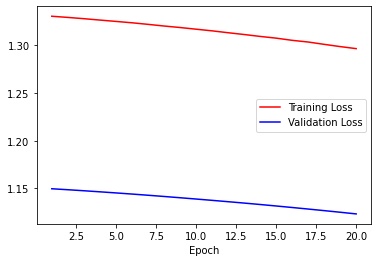

Loss Function: squared_hinge
Optimizer: Adadelta
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch 1/20
149/149 [==============================] - 3s 12ms/step - loss: 1.2995 - accuracy: 0.5410 - val_loss: 1.1128 - val_accuracy: 0.4519
Epoch 2/20
149/149 [==============================] - 1s 9ms/step - loss: 1.2597 - accuracy: 0.5421 - val_loss: 1.0895 - val_accuracy: 0.4519
Epoch 3/20
149/149 [==============================] - 1s 9ms/step - loss: 1.2268 - accuracy: 0.5421 - val_loss: 1.0680 - val_accuracy: 0.4519
Epoch 4/20
149/149 [==============================] - 1s 9ms/step - loss: 1.1932 - accuracy: 0.5421 - val_loss: 1.0459 - val_accuracy: 0.4519
Epoch 5/20
149/149 [==============================] - 1s 9ms/step - loss: 1.1560 - accuracy: 0.5421 - val_loss: 1.0231 - val_accuracy: 0.4519
Epoch 6/20
149/149 [==============================] - 1s 9ms/step - l

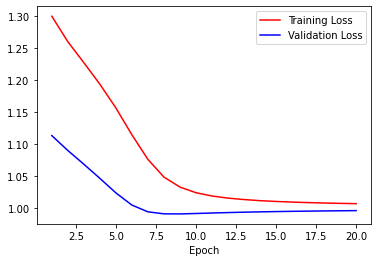

Loss Function: squared_hinge
Optimizer: Adagrad
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch 1/20
149/149 [==============================] - 3s 12ms/step - loss: 1.0459 - accuracy: 0.5417 - val_loss: 0.9995 - val_accuracy: 0.4519
Epoch 2/20
149/149 [==============================] - 1s 10ms/step - loss: 1.0003 - accuracy: 0.5421 - val_loss: 0.9998 - val_accuracy: 0.4519
Epoch 3/20
149/149 [==============================] - 1s 9ms/step - loss: 1.0002 - accuracy: 0.5421 - val_loss: 0.9998 - val_accuracy: 0.4519
Epoch 4/20
149/149 [==============================] - 1s 9ms/step - loss: 1.0001 - accuracy: 0.5421 - val_loss: 0.9999 - val_accuracy: 0.4519
Epoch 5/20
149/149 [==============================] - 1s 10ms/step - loss: 1.0001 - accuracy: 0.5421 - val_loss: 0.9999 - val_accuracy: 0.4519
Epoch 6/20
149/149 [==============================] - 1s 10ms/step -

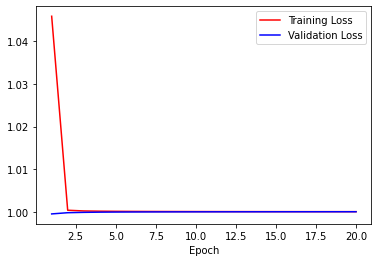

Loss Function: squared_hinge
Optimizer: Adamax
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch 1/20
149/149 [==============================] - 4s 14ms/step - loss: 1.0189 - accuracy: 0.5417 - val_loss: 0.9998 - val_accuracy: 0.4519
Epoch 2/20
149/149 [==============================] - 2s 11ms/step - loss: 1.0001 - accuracy: 0.5421 - val_loss: 0.9999 - val_accuracy: 0.4519
Epoch 3/20
149/149 [==============================] - 2s 11ms/step - loss: 1.0000 - accuracy: 0.5421 - val_loss: 1.0000 - val_accuracy: 0.4519
Epoch 4/20
149/149 [==============================] - 2s 11ms/step - loss: 1.0000 - accuracy: 0.5421 - val_loss: 1.0000 - val_accuracy: 0.4519
Epoch 5/20
149/149 [==============================] - 2s 11ms/step - loss: 1.0000 - accuracy: 0.5421 - val_loss: 1.0000 - val_accuracy: 0.4519
Epoch 6/20
149/149 [==============================] - 2s 11ms/step 

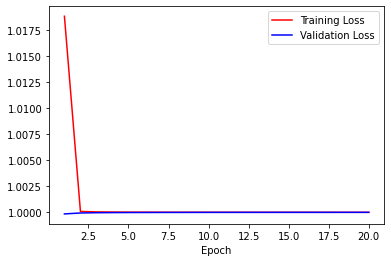

Loss Function: squared_hinge
Optimizer: Nadam
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch 1/20
149/149 [==============================] - 3s 12ms/step - loss: 1.3302 - accuracy: 0.5419 - val_loss: 1.1496 - val_accuracy: 0.4519
Epoch 2/20
149/149 [==============================] - 1s 9ms/step - loss: 1.3265 - accuracy: 0.5421 - val_loss: 1.1477 - val_accuracy: 0.4519
Epoch 3/20
149/149 [==============================] - 1s 9ms/step - loss: 1.3241 - accuracy: 0.5421 - val_loss: 1.1462 - val_accuracy: 0.4519
Epoch 4/20
149/149 [==============================] - 1s 9ms/step - loss: 1.3221 - accuracy: 0.5421 - val_loss: 1.1450 - val_accuracy: 0.4519
Epoch 5/20
149/149 [==============================] - 1s 10ms/step - loss: 1.3205 - accuracy: 0.5421 - val_loss: 1.1439 - val_accuracy: 0.4519
Epoch 6/20
149/149 [==============================] - 1s 9ms/step - los

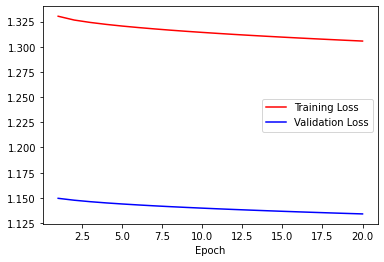

Loss Function: squared_hinge
Optimizer: Ftrl
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch 1/20
149/149 [==============================] - 3s 10ms/step - loss: 1.0412 - accuracy: 0.5398 - val_loss: 0.9543 - val_accuracy: 0.4519
Epoch 2/20
149/149 [==============================] - 1s 8ms/step - loss: 1.0392 - accuracy: 0.5421 - val_loss: 0.9564 - val_accuracy: 0.4519
Epoch 3/20
149/149 [==============================] - 1s 8ms/step - loss: 1.0373 - accuracy: 0.5421 - val_loss: 0.9587 - val_accuracy: 0.4519
Epoch 4/20
149/149 [==============================] - 1s 8ms/step - loss: 1.0353 - accuracy: 0.5421 - val_loss: 0.9611 - val_accuracy: 0.4519
Epoch 5/20
149/149 [==============================] - 1s 8ms/step - loss: 1.0333 - accuracy: 0.5421 - val_loss: 0.9633 - val_accuracy: 0.4519
Epoch 6/20
149/149 [==============================] - 1s 8ms/step - loss:

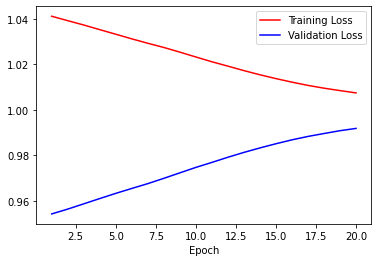

Loss Function: categorical_hinge
Optimizer: SGD
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch 1/20
149/149 [==============================] - 4s 12ms/step - loss: 1.0032 - accuracy: 0.5440 - val_loss: 1.0000 - val_accuracy: 0.4519
Epoch 2/20
149/149 [==============================] - 1s 10ms/step - loss: 1.0000 - accuracy: 0.5421 - val_loss: 1.0000 - val_accuracy: 0.4519
Epoch 3/20
149/149 [==============================] - 1s 10ms/step - loss: 1.0000 - accuracy: 0.5421 - val_loss: 1.0000 - val_accuracy: 0.4519
Epoch 4/20
149/149 [==============================] - 1s 10ms/step - loss: 1.0000 - accuracy: 0.5421 - val_loss: 1.0000 - val_accuracy: 0.4519
Epoch 5/20
149/149 [==============================] - 1s 10ms/step - loss: 1.0000 - accuracy: 0.5421 - val_loss: 1.0000 - val_accuracy: 0.4519
Epoch 6/20
149/149 [==============================] - 1s 10ms/step

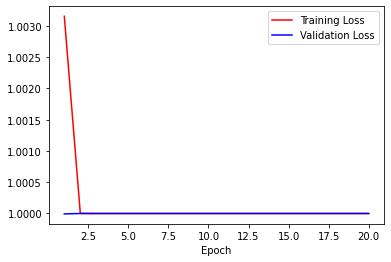

Loss Function: categorical_hinge
Optimizer: RMSprop
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch 1/20
149/149 [==============================] - 4s 16ms/step - loss: 0.8581 - accuracy: 0.7060 - val_loss: 0.6011 - val_accuracy: 0.8516
Epoch 2/20
149/149 [==============================] - 2s 13ms/step - loss: 0.7295 - accuracy: 0.8129 - val_loss: 0.5981 - val_accuracy: 0.8541
Epoch 3/20
149/149 [==============================] - 2s 14ms/step - loss: 0.7293 - accuracy: 0.8129 - val_loss: 0.5971 - val_accuracy: 0.8550
Epoch 4/20
149/149 [==============================] - 2s 13ms/step - loss: 0.7267 - accuracy: 0.8154 - val_loss: 0.5962 - val_accuracy: 0.8558
Epoch 5/20
149/149 [==============================] - 2s 14ms/step - loss: 0.7275 - accuracy: 0.8146 - val_loss: 0.5962 - val_accuracy: 0.8558
Epoch 6/20
149/149 [==============================] - 2s 13ms/

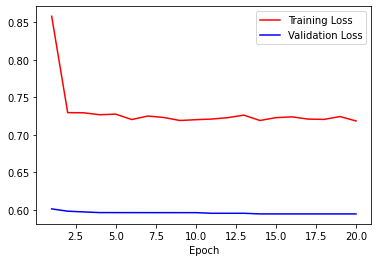

Loss Function: categorical_hinge
Optimizer: Adam
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch 1/20
149/149 [==============================] - 3s 12ms/step - loss: 1.0420 - accuracy: 0.5088 - val_loss: 0.9515 - val_accuracy: 0.5413
Epoch 2/20
149/149 [==============================] - 1s 9ms/step - loss: 1.0420 - accuracy: 0.5187 - val_loss: 0.9515 - val_accuracy: 0.5413
Epoch 3/20
149/149 [==============================] - 1s 9ms/step - loss: 1.0420 - accuracy: 0.5159 - val_loss: 0.9516 - val_accuracy: 0.5363
Epoch 4/20
149/149 [==============================] - 1s 9ms/step - loss: 1.0420 - accuracy: 0.5185 - val_loss: 0.9516 - val_accuracy: 0.5354
Epoch 5/20
149/149 [==============================] - 1s 9ms/step - loss: 1.0420 - accuracy: 0.5197 - val_loss: 0.9516 - val_accuracy: 0.5312
Epoch 6/20
149/149 [==============================] - 1s 9ms/step - l

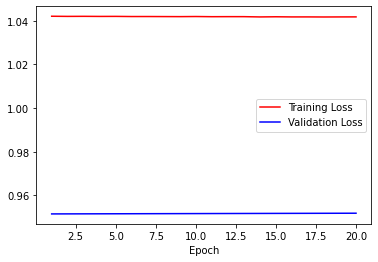

Loss Function: categorical_hinge
Optimizer: Adadelta
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch 1/20
149/149 [==============================] - 3s 11ms/step - loss: 1.0420 - accuracy: 0.5191 - val_loss: 0.9529 - val_accuracy: 0.4511
Epoch 2/20
149/149 [==============================] - 1s 9ms/step - loss: 1.0416 - accuracy: 0.5389 - val_loss: 0.9534 - val_accuracy: 0.4519
Epoch 3/20
149/149 [==============================] - 1s 8ms/step - loss: 1.0411 - accuracy: 0.5421 - val_loss: 0.9538 - val_accuracy: 0.4519
Epoch 4/20
149/149 [==============================] - 1s 9ms/step - loss: 1.0407 - accuracy: 0.5421 - val_loss: 0.9542 - val_accuracy: 0.4519
Epoch 5/20
149/149 [==============================] - 1s 9ms/step - loss: 1.0405 - accuracy: 0.5421 - val_loss: 0.9545 - val_accuracy: 0.4519
Epoch 6/20
149/149 [==============================] - 1s 9ms/step

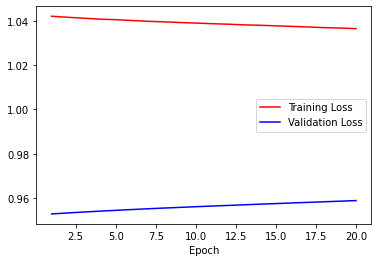

Loss Function: categorical_hinge
Optimizer: Adagrad
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch 1/20
149/149 [==============================] - 4s 11ms/step - loss: 1.0184 - accuracy: 0.5400 - val_loss: 0.9995 - val_accuracy: 0.4519
Epoch 2/20
149/149 [==============================] - 1s 9ms/step - loss: 1.0003 - accuracy: 0.5421 - val_loss: 0.9998 - val_accuracy: 0.4519
Epoch 3/20
149/149 [==============================] - 1s 9ms/step - loss: 1.0001 - accuracy: 0.5421 - val_loss: 0.9999 - val_accuracy: 0.4519
Epoch 4/20
149/149 [==============================] - 1s 9ms/step - loss: 1.0001 - accuracy: 0.5421 - val_loss: 0.9999 - val_accuracy: 0.4519
Epoch 5/20
149/149 [==============================] - 1s 9ms/step - loss: 1.0001 - accuracy: 0.5421 - val_loss: 0.9999 - val_accuracy: 0.4519
Epoch 6/20
149/149 [==============================] - 1s 9ms/step 

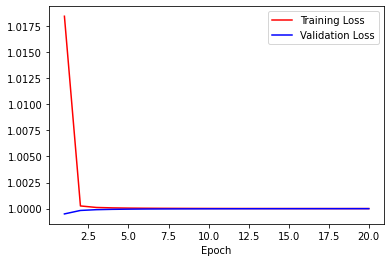

Loss Function: categorical_hinge
Optimizer: Adamax
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch 1/20
149/149 [==============================] - 4s 15ms/step - loss: 1.0119 - accuracy: 0.5410 - val_loss: 0.9999 - val_accuracy: 0.4519
Epoch 2/20
149/149 [==============================] - 2s 11ms/step - loss: 1.0000 - accuracy: 0.5421 - val_loss: 1.0000 - val_accuracy: 0.4519
Epoch 3/20
149/149 [==============================] - 2s 12ms/step - loss: 1.0000 - accuracy: 0.5421 - val_loss: 1.0000 - val_accuracy: 0.4519
Epoch 4/20
149/149 [==============================] - 2s 11ms/step - loss: 1.0000 - accuracy: 0.5421 - val_loss: 1.0000 - val_accuracy: 0.4519
Epoch 5/20
149/149 [==============================] - 2s 11ms/step - loss: 1.0000 - accuracy: 0.5421 - val_loss: 1.0000 - val_accuracy: 0.4519
Epoch 6/20
149/149 [==============================] - 2s 11ms/s

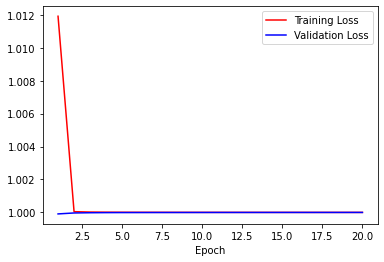

Loss Function: categorical_hinge
Optimizer: Nadam
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch 1/20
149/149 [==============================] - 4s 12ms/step - loss: 1.0420 - accuracy: 0.5421 - val_loss: 0.9521 - val_accuracy: 0.4519
Epoch 2/20
149/149 [==============================] - 1s 10ms/step - loss: 1.0419 - accuracy: 0.5421 - val_loss: 0.9522 - val_accuracy: 0.4519
Epoch 3/20
149/149 [==============================] - 1s 9ms/step - loss: 1.0418 - accuracy: 0.5421 - val_loss: 0.9523 - val_accuracy: 0.4519
Epoch 4/20
149/149 [==============================] - 1s 9ms/step - loss: 1.0418 - accuracy: 0.5421 - val_loss: 0.9523 - val_accuracy: 0.4519
Epoch 5/20
149/149 [==============================] - 1s 10ms/step - loss: 1.0417 - accuracy: 0.5421 - val_loss: 0.9524 - val_accuracy: 0.4519
Epoch 6/20
149/149 [==============================] - 1s 9ms/step 

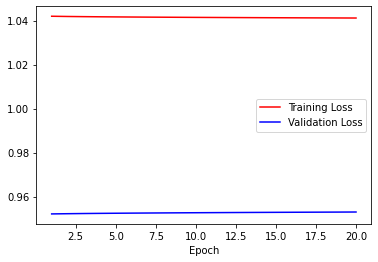

Loss Function: categorical_hinge
Optimizer: Ftrl
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
optimizers = ["SGD", "RMSprop", "Adam", "Adadelta", "Adagrad", "Adamax", "Nadam", "Ftrl"]
loss_functions = ["binary_crossentropy", "categorical_crossentropy", "poisson", "kl_divergence", "hinge", "squared_hinge", "categorical_hinge"]
for l in loss_functions:
  for op in optimizers:
    model = Sequential()
    model.add(Embedding(num_total_words, 32, input_length=max_length))
    model.add(LSTM(64, dropout=0.5))
    model.add(Dense(1, activation="sigmoid"))

    model.compile(loss=l, optimizer=op, metrics=["accuracy"])
    train_and_vizualize_model(model, 20)
    print("Loss Function:", l)
    print("Optimizer:",op)
    print("-"*170)

Hence, the best loss function is poisson and the best optimizer is Adamax

# **Choosing the Activation Function**

Epoch 1/20
149/149 [==============================] - 3s 11ms/step - loss: 0.8873 - accuracy: 0.5617 - val_loss: 0.9083 - val_accuracy: 0.5101
Epoch 2/20
149/149 [==============================] - 1s 8ms/step - loss: 0.7864 - accuracy: 0.5959 - val_loss: 0.8623 - val_accuracy: 0.5607
Epoch 3/20
149/149 [==============================] - 1s 8ms/step - loss: 0.6046 - accuracy: 0.8749 - val_loss: 0.6021 - val_accuracy: 0.9494
Epoch 4/20
149/149 [==============================] - 1s 8ms/step - loss: 0.5296 - accuracy: 0.9532 - val_loss: 0.6230 - val_accuracy: 0.9427
Epoch 5/20
149/149 [==============================] - 1s 8ms/step - loss: 0.5213 - accuracy: 0.9584 - val_loss: 0.6173 - val_accuracy: 0.9528
Epoch 6/20
149/149 [==============================] - 1s 8ms/step - loss: 0.5106 - accuracy: 0.9692 - val_loss: 0.6128 - val_accuracy: 0.9452
Epoch 7/20
149/149 [==============================] - 1s 8ms/step - loss: 0.5072 - accuracy: 0.9700 - val_loss: 0.6097 - val_accuracy: 0.9486
Epoch

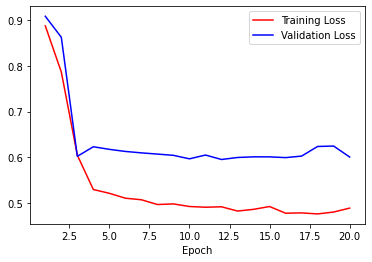

Activation Function: relu
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch 1/20
149/149 [==============================] - 3s 10ms/step - loss: 0.7943 - accuracy: 0.5838 - val_loss: 0.8400 - val_accuracy: 0.5801
Epoch 2/20
149/149 [==============================] - 1s 8ms/step - loss: 0.6278 - accuracy: 0.8338 - val_loss: 0.6614 - val_accuracy: 0.9250
Epoch 3/20
149/149 [==============================] - 1s 8ms/step - loss: 0.5622 - accuracy: 0.9270 - val_loss: 0.6289 - val_accuracy: 0.9418
Epoch 4/20
149/149 [==============================] - 1s 8ms/step - loss: 0.5341 - accuracy: 0.9380 - val_loss: 0.6178 - val_accuracy: 0.9477
Epoch 5/20
149/149 [==============================] - 1s 8ms/step - loss: 0.5246 - accuracy: 0.9460 - val_loss: 0.6022 - val_accuracy: 0.9587
Epoch 6/20
149/149 [==============================] - 1s 8ms/step - loss: 0.5053 - accuracy:

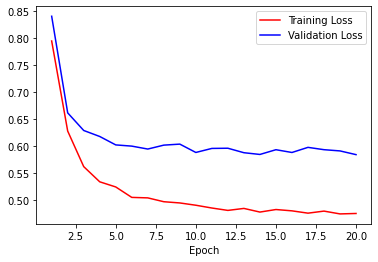

Activation Function: sigmoid
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch 1/20
149/149 [==============================] - 4s 11ms/step - loss: 1.0000 - accuracy: 0.4579 - val_loss: 1.0000 - val_accuracy: 0.5481
Epoch 2/20
149/149 [==============================] - 1s 8ms/step - loss: 1.0000 - accuracy: 0.4579 - val_loss: 1.0000 - val_accuracy: 0.5481
Epoch 3/20
149/149 [==============================] - 1s 8ms/step - loss: 1.0000 - accuracy: 0.4579 - val_loss: 1.0000 - val_accuracy: 0.5481
Epoch 4/20
149/149 [==============================] - 1s 8ms/step - loss: 1.0000 - accuracy: 0.4579 - val_loss: 1.0000 - val_accuracy: 0.5481
Epoch 5/20
149/149 [==============================] - 1s 8ms/step - loss: 1.0000 - accuracy: 0.4579 - val_loss: 1.0000 - val_accuracy: 0.5481
Epoch 6/20
149/149 [==============================] - 1s 8ms/step - loss: 1.0000 - accura

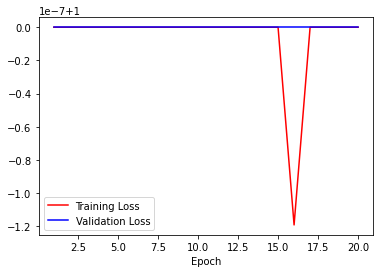

Activation Function: softmax
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch 1/20
149/149 [==============================] - 3s 11ms/step - loss: 0.8191 - accuracy: 0.5117 - val_loss: 0.8938 - val_accuracy: 0.4519
Epoch 2/20
149/149 [==============================] - 1s 8ms/step - loss: 0.7393 - accuracy: 0.6497 - val_loss: 0.7478 - val_accuracy: 0.8449
Epoch 3/20
149/149 [==============================] - 1s 8ms/step - loss: 0.5693 - accuracy: 0.9023 - val_loss: 0.6388 - val_accuracy: 0.9199
Epoch 4/20
149/149 [==============================] - 1s 8ms/step - loss: 0.5366 - accuracy: 0.9308 - val_loss: 0.6185 - val_accuracy: 0.9477
Epoch 5/20
149/149 [==============================] - 1s 8ms/step - loss: 0.5147 - accuracy: 0.9483 - val_loss: 0.6132 - val_accuracy: 0.9604
Epoch 6/20
149/149 [==============================] - 1s 8ms/step - loss: 0.5128 - accura

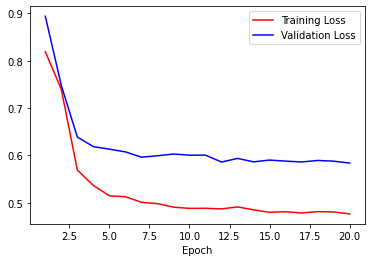

Activation Function: softplus
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch 1/20
149/149 [==============================] - 3s 11ms/step - loss: nan - accuracy: 0.5706 - val_loss: 0.8728 - val_accuracy: 0.5219
Epoch 2/20
149/149 [==============================] - 1s 8ms/step - loss: nan - accuracy: 0.7214 - val_loss: nan - val_accuracy: 0.6239
Epoch 3/20
149/149 [==============================] - 1s 8ms/step - loss: nan - accuracy: 0.7066 - val_loss: nan - val_accuracy: 0.6298
Epoch 4/20
149/149 [==============================] - 1s 8ms/step - loss: nan - accuracy: 0.6657 - val_loss: nan - val_accuracy: 0.6172
Epoch 5/20
149/149 [==============================] - 1s 8ms/step - loss: nan - accuracy: 0.6551 - val_loss: nan - val_accuracy: 0.6341
Epoch 6/20
149/149 [==============================] - 1s 8ms/step - loss: nan - accuracy: 0.6889 - val_loss: nan - 

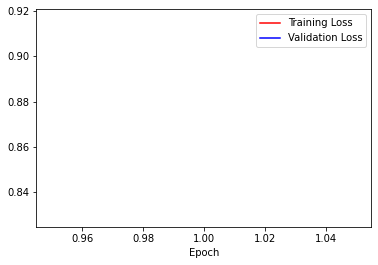

Activation Function: softsign
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch 1/20
149/149 [==============================] - 3s 10ms/step - loss: nan - accuracy: 0.5547 - val_loss: 0.8950 - val_accuracy: 0.5118
Epoch 2/20
149/149 [==============================] - 1s 8ms/step - loss: 0.7945 - accuracy: 0.5769 - val_loss: 0.8798 - val_accuracy: 0.5320
Epoch 3/20
149/149 [==============================] - 1s 8ms/step - loss: nan - accuracy: 0.7863 - val_loss: nan - val_accuracy: 0.7218
Epoch 4/20
149/149 [==============================] - 1s 8ms/step - loss: nan - accuracy: 0.6465 - val_loss: nan - val_accuracy: 0.4933
Epoch 5/20
149/149 [==============================] - 1s 8ms/step - loss: nan - accuracy: 0.5805 - val_loss: nan - val_accuracy: 0.4646
Epoch 6/20
149/149 [==============================] - 1s 8ms/step - loss: nan - accuracy: 0.5611 - val_loss: 

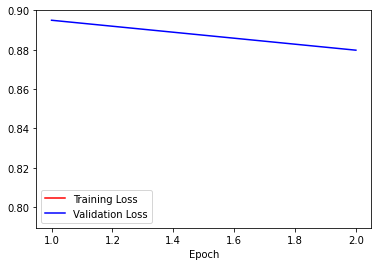

Activation Function: tanh
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch 1/20
149/149 [==============================] - 3s 10ms/step - loss: nan - accuracy: 0.5568 - val_loss: 0.9001 - val_accuracy: 0.5101
Epoch 2/20
149/149 [==============================] - 1s 8ms/step - loss: 0.7971 - accuracy: 0.5746 - val_loss: 0.8757 - val_accuracy: 0.5245
Epoch 3/20
149/149 [==============================] - 1s 8ms/step - loss: nan - accuracy: 0.7948 - val_loss: nan - val_accuracy: 0.6998
Epoch 4/20
149/149 [==============================] - 1s 8ms/step - loss: nan - accuracy: 0.7003 - val_loss: nan - val_accuracy: 0.4831
Epoch 5/20
149/149 [==============================] - 1s 8ms/step - loss: nan - accuracy: 0.5573 - val_loss: nan - val_accuracy: 0.4562
Epoch 6/20
149/149 [==============================] - 1s 8ms/step - loss: nan - accuracy: 0.5450 - val_loss: nan 

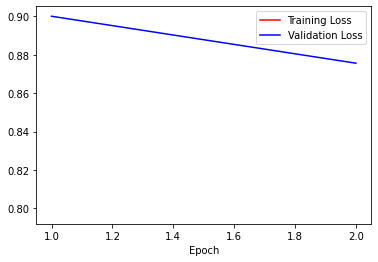

Activation Function: selu
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch 1/20
149/149 [==============================] - 3s 11ms/step - loss: nan - accuracy: 0.5659 - val_loss: 0.9115 - val_accuracy: 0.5118
Epoch 2/20
149/149 [==============================] - 1s 8ms/step - loss: nan - accuracy: 0.6111 - val_loss: 0.8560 - val_accuracy: 0.5995
Epoch 3/20
149/149 [==============================] - 1s 8ms/step - loss: nan - accuracy: 0.7465 - val_loss: nan - val_accuracy: 0.4545
Epoch 4/20
149/149 [==============================] - 1s 8ms/step - loss: nan - accuracy: 0.5499 - val_loss: nan - val_accuracy: 0.4519
Epoch 5/20
149/149 [==============================] - 1s 8ms/step - loss: nan - accuracy: 0.5427 - val_loss: nan - val_accuracy: 0.4519
Epoch 6/20
149/149 [==============================] - 1s 8ms/step - loss: nan - accuracy: 0.5429 - val_loss: nan - v

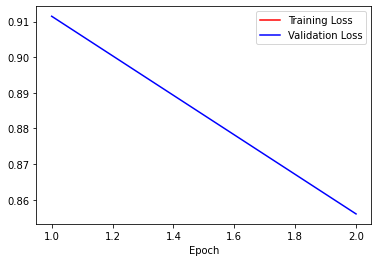

Activation Function: elu
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
functions = ["relu", "sigmoid", "softmax", "softplus", "softsign", "tanh", "selu", "elu"]
for act in functions:
  model = Sequential()
  model.add(Embedding(num_total_words, 32, input_length=max_length))
  model.add(LSTM(64, dropout=0.5))
  model.add(Dense(1, activation=act))

  model.compile(loss="poisson", optimizer="Adamax", metrics=["accuracy"])
  train_and_vizualize_model(model, 20)
  print("Activation Function:", act)
  print("-"*170)

Now, we will try Leaky ReLU

Epoch 1/20
149/149 [==============================] - 3s 11ms/step - loss: nan - accuracy: 0.5638 - val_loss: 0.9078 - val_accuracy: 0.5185
Epoch 2/20
149/149 [==============================] - 1s 8ms/step - loss: nan - accuracy: 0.6412 - val_loss: nan - val_accuracy: 0.7892
Epoch 3/20
149/149 [==============================] - 1s 8ms/step - loss: nan - accuracy: 0.9211 - val_loss: nan - val_accuracy: 0.9300
Epoch 4/20
149/149 [==============================] - 1s 8ms/step - loss: nan - accuracy: 0.9559 - val_loss: nan - val_accuracy: 0.9486
Epoch 5/20
149/149 [==============================] - 1s 8ms/step - loss: nan - accuracy: 0.9622 - val_loss: nan - val_accuracy: 0.9233
Epoch 6/20
149/149 [==============================] - 1s 8ms/step - loss: nan - accuracy: 0.6621 - val_loss: nan - val_accuracy: 0.4553
Epoch 7/20
149/149 [==============================] - 1s 8ms/step - loss: nan - accuracy: 0.5421 - val_loss: nan - val_accuracy: 0.4553
Epoch 8/20
149/149 [========================

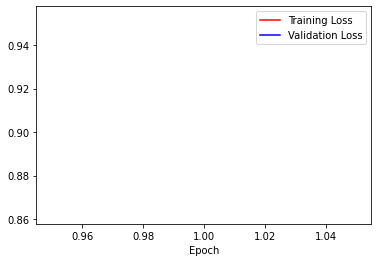

In [ ]:
model = Sequential()
model.add(Embedding(num_total_words, 32, input_length=max_length))
model.add(LSTM(64, dropout=0.5))
model.add(Dense(1))
model.add(keras.layers.LeakyReLU(alpha=0.2))

model.compile(loss="poisson", optimizer="Adamax", metrics=["accuracy"])
train_and_vizualize_model(model, 20)

The best activation function is softplus

# **Changing Embedding Depth**

Epoch 1/20
149/149 [==============================] - 4s 11ms/step - loss: 0.8211 - accuracy: 0.5151 - val_loss: 0.8939 - val_accuracy: 0.4519
Epoch 2/20
149/149 [==============================] - 1s 8ms/step - loss: 0.8152 - accuracy: 0.5370 - val_loss: 0.8872 - val_accuracy: 0.4519
Epoch 3/20
149/149 [==============================] - 1s 8ms/step - loss: 0.8009 - accuracy: 0.5678 - val_loss: 0.8706 - val_accuracy: 0.5489
Epoch 4/20
149/149 [==============================] - 1s 8ms/step - loss: 0.6869 - accuracy: 0.7410 - val_loss: 0.7423 - val_accuracy: 0.8255
Epoch 5/20
149/149 [==============================] - 1s 8ms/step - loss: 0.5928 - accuracy: 0.8903 - val_loss: 0.6461 - val_accuracy: 0.9275
Epoch 6/20
149/149 [==============================] - 1s 8ms/step - loss: 0.5664 - accuracy: 0.9026 - val_loss: 0.6267 - val_accuracy: 0.9469
Epoch 7/20
149/149 [==============================] - 1s 8ms/step - loss: 0.5475 - accuracy: 0.9236 - val_loss: 0.6152 - val_accuracy: 0.9469
Epoch

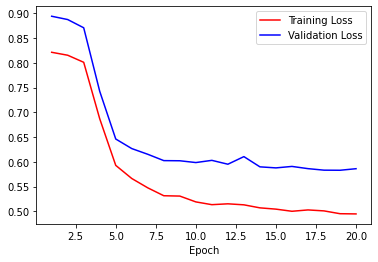

Number of Embedding layers: 4
----------------------------------------------------------------------------------------------------
Epoch 1/20
149/149 [==============================] - 3s 11ms/step - loss: 0.8232 - accuracy: 0.4891 - val_loss: 0.8816 - val_accuracy: 0.4519
Epoch 2/20
149/149 [==============================] - 1s 8ms/step - loss: 0.8094 - accuracy: 0.5615 - val_loss: 0.8851 - val_accuracy: 0.5202
Epoch 3/20
149/149 [==============================] - 1s 8ms/step - loss: 0.6891 - accuracy: 0.7406 - val_loss: 0.7004 - val_accuracy: 0.8761
Epoch 4/20
149/149 [==============================] - 1s 8ms/step - loss: 0.5779 - accuracy: 0.9061 - val_loss: 0.6462 - val_accuracy: 0.9351
Epoch 5/20
149/149 [==============================] - 1s 8ms/step - loss: 0.5551 - accuracy: 0.9186 - val_loss: 0.6395 - val_accuracy: 0.9384
Epoch 6/20
149/149 [==============================] - 1s 8ms/step - loss: 0.5420 - accuracy: 0.9279 - val_loss: 0.6331 - val_accuracy: 0.9469
Epoch 7/20
149/1

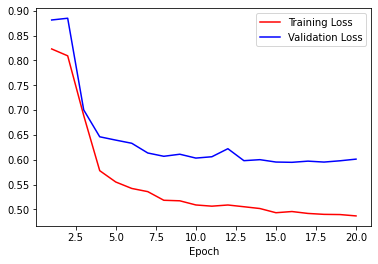

Number of Embedding layers: 8
----------------------------------------------------------------------------------------------------
Epoch 1/20
149/149 [==============================] - 4s 11ms/step - loss: 0.8219 - accuracy: 0.5075 - val_loss: 0.8952 - val_accuracy: 0.4519
Epoch 2/20
149/149 [==============================] - 1s 8ms/step - loss: 0.7708 - accuracy: 0.6054 - val_loss: 0.7884 - val_accuracy: 0.6965
Epoch 3/20
149/149 [==============================] - 1s 8ms/step - loss: 0.5910 - accuracy: 0.8836 - val_loss: 0.6668 - val_accuracy: 0.8685
Epoch 4/20
149/149 [==============================] - 1s 8ms/step - loss: 0.5395 - accuracy: 0.9291 - val_loss: 0.6204 - val_accuracy: 0.9283
Epoch 5/20
149/149 [==============================] - 1s 8ms/step - loss: 0.5329 - accuracy: 0.9350 - val_loss: 0.6089 - val_accuracy: 0.9578
Epoch 6/20
149/149 [==============================] - 1s 8ms/step - loss: 0.5140 - accuracy: 0.9487 - val_loss: 0.6024 - val_accuracy: 0.9469
Epoch 7/20
149/1

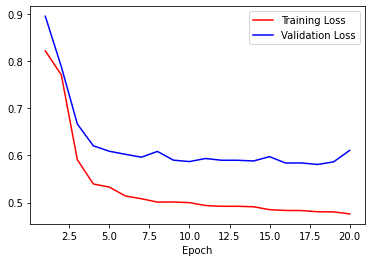

Number of Embedding layers: 16
----------------------------------------------------------------------------------------------------
Epoch 1/20
149/149 [==============================] - 3s 11ms/step - loss: 0.8207 - accuracy: 0.5043 - val_loss: 0.8860 - val_accuracy: 0.4519
Epoch 2/20
149/149 [==============================] - 1s 8ms/step - loss: 0.7322 - accuracy: 0.6674 - val_loss: 0.7710 - val_accuracy: 0.7479
Epoch 3/20
149/149 [==============================] - 1s 8ms/step - loss: 0.5811 - accuracy: 0.8899 - val_loss: 0.6368 - val_accuracy: 0.9351
Epoch 4/20
149/149 [==============================] - 1s 8ms/step - loss: 0.5371 - accuracy: 0.9327 - val_loss: 0.6349 - val_accuracy: 0.9047
Epoch 5/20
149/149 [==============================] - 1s 8ms/step - loss: 0.5280 - accuracy: 0.9403 - val_loss: 0.6059 - val_accuracy: 0.9570
Epoch 6/20
149/149 [==============================] - 1s 8ms/step - loss: 0.5055 - accuracy: 0.9565 - val_loss: 0.6013 - val_accuracy: 0.9553
Epoch 7/20
149/

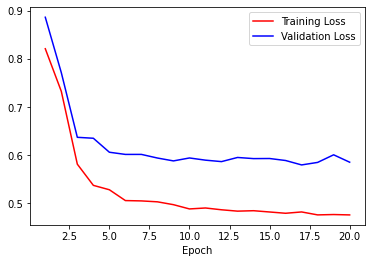

Number of Embedding layers: 32
----------------------------------------------------------------------------------------------------
Epoch 1/20
149/149 [==============================] - 3s 11ms/step - loss: 0.8209 - accuracy: 0.4877 - val_loss: 0.8917 - val_accuracy: 0.5076
Epoch 2/20
149/149 [==============================] - 1s 8ms/step - loss: 0.7064 - accuracy: 0.7112 - val_loss: 0.6841 - val_accuracy: 0.8541
Epoch 3/20
149/149 [==============================] - 1s 8ms/step - loss: 0.5402 - accuracy: 0.9312 - val_loss: 0.6141 - val_accuracy: 0.9469
Epoch 4/20
149/149 [==============================] - 1s 8ms/step - loss: 0.5191 - accuracy: 0.9458 - val_loss: 0.6137 - val_accuracy: 0.9359
Epoch 5/20
149/149 [==============================] - 1s 8ms/step - loss: 0.5099 - accuracy: 0.9561 - val_loss: 0.6184 - val_accuracy: 0.9258
Epoch 6/20
149/149 [==============================] - 1s 8ms/step - loss: 0.5007 - accuracy: 0.9637 - val_loss: 0.6042 - val_accuracy: 0.9604
Epoch 7/20
149/

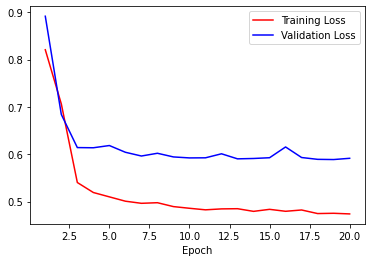

Number of Embedding layers: 64
----------------------------------------------------------------------------------------------------
Epoch 1/20
149/149 [==============================] - 4s 11ms/step - loss: 0.8113 - accuracy: 0.5250 - val_loss: 0.8731 - val_accuracy: 0.5691
Epoch 2/20
149/149 [==============================] - 1s 8ms/step - loss: 0.5864 - accuracy: 0.8988 - val_loss: 0.6621 - val_accuracy: 0.9410
Epoch 3/20
149/149 [==============================] - 1s 8ms/step - loss: 0.5264 - accuracy: 0.9591 - val_loss: 0.6151 - val_accuracy: 0.9511
Epoch 4/20
149/149 [==============================] - 1s 8ms/step - loss: 0.5192 - accuracy: 0.9559 - val_loss: 0.6049 - val_accuracy: 0.9553
Epoch 5/20
149/149 [==============================] - 1s 8ms/step - loss: 0.5095 - accuracy: 0.9641 - val_loss: 0.6071 - val_accuracy: 0.9486
Epoch 6/20
149/149 [==============================] - 1s 8ms/step - loss: 0.5030 - accuracy: 0.9673 - val_loss: 0.6089 - val_accuracy: 0.9435
Epoch 7/20
149/

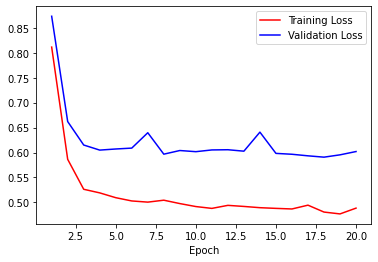

Number of Embedding layers: 128
----------------------------------------------------------------------------------------------------


In [ ]:
n = 4
while n < 130:   
  model = Sequential()

  model.add(Embedding(num_total_words, n, input_length=max_length))
  model.add(LSTM(64, dropout=0.5))
  model.add(Dense(1, activation="softplus"))
  
  model.compile(loss="poisson", optimizer="Adamax", metrics=["accuracy"])
  train_and_vizualize_model(model, 20)
  print("Number of Embedding layers:", n)
  print("-"*100)
  n = n*2


Let's try to fine-tune it

Epoch 1/20
149/149 [==============================] - 3s 11ms/step - loss: 0.8230 - accuracy: 0.4906 - val_loss: 0.8835 - val_accuracy: 0.4519
Epoch 2/20
149/149 [==============================] - 1s 8ms/step - loss: 0.7786 - accuracy: 0.5984 - val_loss: 0.8715 - val_accuracy: 0.6408
Epoch 3/20
149/149 [==============================] - 1s 8ms/step - loss: 0.6079 - accuracy: 0.8597 - val_loss: 0.6423 - val_accuracy: 0.9317
Epoch 4/20
149/149 [==============================] - 1s 8ms/step - loss: 0.5486 - accuracy: 0.9321 - val_loss: 0.6385 - val_accuracy: 0.9056
Epoch 5/20
149/149 [==============================] - 1s 8ms/step - loss: 0.5341 - accuracy: 0.9317 - val_loss: 0.6075 - val_accuracy: 0.9444
Epoch 6/20
149/149 [==============================] - 1s 8ms/step - loss: 0.5160 - accuracy: 0.9517 - val_loss: 0.5975 - val_accuracy: 0.9663
Epoch 7/20
149/149 [==============================] - 1s 8ms/step - loss: 0.5057 - accuracy: 0.9574 - val_loss: 0.6049 - val_accuracy: 0.9418
Epoch

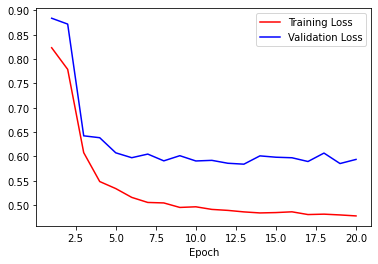

Number of Embedding layers: 20
----------------------------------------------------------------------------------------------------
Epoch 1/20
149/149 [==============================] - 3s 11ms/step - loss: 0.8221 - accuracy: 0.4976 - val_loss: 0.8858 - val_accuracy: 0.4519
Epoch 2/20
149/149 [==============================] - 1s 8ms/step - loss: 0.7836 - accuracy: 0.5849 - val_loss: 0.7779 - val_accuracy: 0.7099
Epoch 3/20
149/149 [==============================] - 1s 8ms/step - loss: 0.5967 - accuracy: 0.8796 - val_loss: 0.6532 - val_accuracy: 0.9216
Epoch 4/20
149/149 [==============================] - 1s 8ms/step - loss: 0.5366 - accuracy: 0.9279 - val_loss: 0.6518 - val_accuracy: 0.9435
Epoch 5/20
149/149 [==============================] - 1s 8ms/step - loss: 0.5237 - accuracy: 0.9418 - val_loss: 0.6080 - val_accuracy: 0.9469
Epoch 6/20
149/149 [==============================] - 1s 8ms/step - loss: 0.5131 - accuracy: 0.9563 - val_loss: 0.6051 - val_accuracy: 0.9511
Epoch 7/20
149/

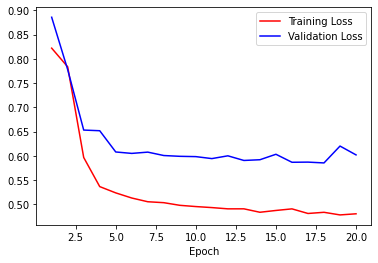

Number of Embedding layers: 22
----------------------------------------------------------------------------------------------------
Epoch 1/20
149/149 [==============================] - 3s 11ms/step - loss: 0.8216 - accuracy: 0.4870 - val_loss: 0.8802 - val_accuracy: 0.5126
Epoch 2/20
149/149 [==============================] - 1s 8ms/step - loss: 0.7561 - accuracy: 0.6248 - val_loss: 0.7422 - val_accuracy: 0.8305
Epoch 3/20
149/149 [==============================] - 1s 8ms/step - loss: 0.5772 - accuracy: 0.9040 - val_loss: 0.6380 - val_accuracy: 0.9460
Epoch 4/20
149/149 [==============================] - 1s 8ms/step - loss: 0.5378 - accuracy: 0.9344 - val_loss: 0.6222 - val_accuracy: 0.9342
Epoch 5/20
149/149 [==============================] - 1s 8ms/step - loss: 0.5304 - accuracy: 0.9422 - val_loss: 0.6065 - val_accuracy: 0.9486
Epoch 6/20
149/149 [==============================] - 1s 8ms/step - loss: 0.5170 - accuracy: 0.9509 - val_loss: 0.5997 - val_accuracy: 0.9528
Epoch 7/20
149/

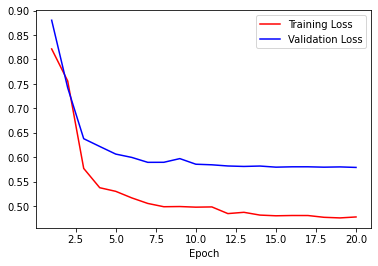

Number of Embedding layers: 24
----------------------------------------------------------------------------------------------------
Epoch 1/20
149/149 [==============================] - 3s 11ms/step - loss: 0.8233 - accuracy: 0.4984 - val_loss: 0.8788 - val_accuracy: 0.5143
Epoch 2/20
149/149 [==============================] - 1s 8ms/step - loss: 0.7746 - accuracy: 0.6054 - val_loss: 0.8154 - val_accuracy: 0.6223
Epoch 3/20
149/149 [==============================] - 1s 8ms/step - loss: 0.5924 - accuracy: 0.8789 - val_loss: 0.6391 - val_accuracy: 0.9460
Epoch 4/20
149/149 [==============================] - 1s 8ms/step - loss: 0.5350 - accuracy: 0.9310 - val_loss: 0.6470 - val_accuracy: 0.8929
Epoch 5/20
149/149 [==============================] - 1s 8ms/step - loss: 0.5283 - accuracy: 0.9388 - val_loss: 0.5961 - val_accuracy: 0.9562
Epoch 6/20
149/149 [==============================] - 1s 8ms/step - loss: 0.5090 - accuracy: 0.9563 - val_loss: 0.5914 - val_accuracy: 0.9570
Epoch 7/20
149/

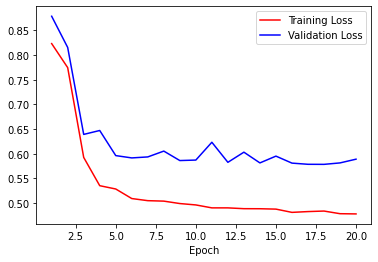

Number of Embedding layers: 26
----------------------------------------------------------------------------------------------------
Epoch 1/20
149/149 [==============================] - 3s 11ms/step - loss: 0.8129 - accuracy: 0.5347 - val_loss: 0.9314 - val_accuracy: 0.5413
Epoch 2/20
149/149 [==============================] - 1s 8ms/step - loss: 0.6451 - accuracy: 0.8127 - val_loss: 0.6432 - val_accuracy: 0.9376
Epoch 3/20
149/149 [==============================] - 1s 8ms/step - loss: 0.5354 - accuracy: 0.9304 - val_loss: 0.5973 - val_accuracy: 0.9595
Epoch 4/20
149/149 [==============================] - 1s 8ms/step - loss: 0.5212 - accuracy: 0.9464 - val_loss: 0.6040 - val_accuracy: 0.9511
Epoch 5/20
149/149 [==============================] - 1s 8ms/step - loss: 0.5073 - accuracy: 0.9578 - val_loss: 0.5936 - val_accuracy: 0.9545
Epoch 6/20
149/149 [==============================] - 1s 8ms/step - loss: 0.5082 - accuracy: 0.9582 - val_loss: 0.5892 - val_accuracy: 0.9654
Epoch 7/20
149/

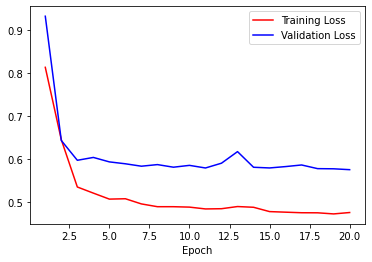

Number of Embedding layers: 28
----------------------------------------------------------------------------------------------------
Epoch 1/20
149/149 [==============================] - 3s 10ms/step - loss: 0.8239 - accuracy: 0.4813 - val_loss: 0.8866 - val_accuracy: 0.4519
Epoch 2/20
149/149 [==============================] - 1s 8ms/step - loss: 0.7405 - accuracy: 0.6688 - val_loss: 0.6673 - val_accuracy: 0.8946
Epoch 3/20
149/149 [==============================] - 1s 8ms/step - loss: 0.5791 - accuracy: 0.8895 - val_loss: 0.6256 - val_accuracy: 0.9283
Epoch 4/20
149/149 [==============================] - 1s 8ms/step - loss: 0.5338 - accuracy: 0.9369 - val_loss: 0.6452 - val_accuracy: 0.9005
Epoch 5/20
149/149 [==============================] - 1s 8ms/step - loss: 0.5222 - accuracy: 0.9458 - val_loss: 0.6055 - val_accuracy: 0.9393
Epoch 6/20
149/149 [==============================] - 1s 8ms/step - loss: 0.5064 - accuracy: 0.9576 - val_loss: 0.5989 - val_accuracy: 0.9477
Epoch 7/20
149/

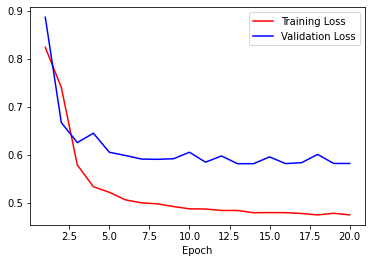

Number of Embedding layers: 30
----------------------------------------------------------------------------------------------------
Epoch 1/20
149/149 [==============================] - 4s 11ms/step - loss: 0.8206 - accuracy: 0.4946 - val_loss: 0.8902 - val_accuracy: 0.5236
Epoch 2/20
149/149 [==============================] - 1s 8ms/step - loss: 0.6672 - accuracy: 0.7775 - val_loss: 0.6376 - val_accuracy: 0.9292
Epoch 3/20
149/149 [==============================] - 1s 8ms/step - loss: 0.5420 - accuracy: 0.9304 - val_loss: 0.6100 - val_accuracy: 0.9460
Epoch 4/20
149/149 [==============================] - 1s 8ms/step - loss: 0.5217 - accuracy: 0.9490 - val_loss: 0.6024 - val_accuracy: 0.9469
Epoch 5/20
149/149 [==============================] - 1s 8ms/step - loss: 0.5132 - accuracy: 0.9555 - val_loss: 0.6012 - val_accuracy: 0.9452
Epoch 6/20
149/149 [==============================] - 1s 8ms/step - loss: 0.5026 - accuracy: 0.9631 - val_loss: 0.5939 - val_accuracy: 0.9570
Epoch 7/20
149/

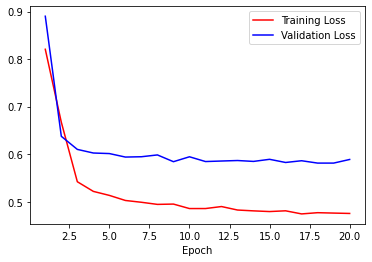

Number of Embedding layers: 32
----------------------------------------------------------------------------------------------------
Epoch 1/20
149/149 [==============================] - 3s 10ms/step - loss: 0.8194 - accuracy: 0.4999 - val_loss: 0.8882 - val_accuracy: 0.4519
Epoch 2/20
149/149 [==============================] - 1s 8ms/step - loss: 0.7121 - accuracy: 0.7028 - val_loss: 0.7125 - val_accuracy: 0.8811
Epoch 3/20
149/149 [==============================] - 1s 8ms/step - loss: 0.5599 - accuracy: 0.9260 - val_loss: 0.6383 - val_accuracy: 0.9056
Epoch 4/20
149/149 [==============================] - 1s 8ms/step - loss: 0.5242 - accuracy: 0.9475 - val_loss: 0.6142 - val_accuracy: 0.9553
Epoch 5/20
149/149 [==============================] - 1s 8ms/step - loss: 0.5159 - accuracy: 0.9544 - val_loss: 0.6009 - val_accuracy: 0.9604
Epoch 6/20
149/149 [==============================] - 1s 8ms/step - loss: 0.5023 - accuracy: 0.9639 - val_loss: 0.6204 - val_accuracy: 0.9250
Epoch 7/20
149/

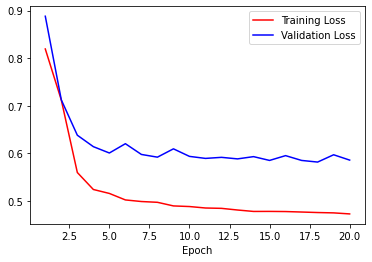

Number of Embedding layers: 34
----------------------------------------------------------------------------------------------------
Epoch 1/20
149/149 [==============================] - 3s 11ms/step - loss: 0.8209 - accuracy: 0.5041 - val_loss: 0.8896 - val_accuracy: 0.5143
Epoch 2/20
149/149 [==============================] - 1s 8ms/step - loss: 0.7543 - accuracy: 0.6393 - val_loss: 0.7696 - val_accuracy: 0.7487
Epoch 3/20
149/149 [==============================] - 1s 8ms/step - loss: 0.5895 - accuracy: 0.8836 - val_loss: 0.6574 - val_accuracy: 0.9368
Epoch 4/20
149/149 [==============================] - 1s 8ms/step - loss: 0.5433 - accuracy: 0.9306 - val_loss: 0.6199 - val_accuracy: 0.9384
Epoch 5/20
149/149 [==============================] - 1s 8ms/step - loss: 0.5171 - accuracy: 0.9534 - val_loss: 0.6003 - val_accuracy: 0.9503
Epoch 6/20
149/149 [==============================] - 1s 8ms/step - loss: 0.5130 - accuracy: 0.9521 - val_loss: 0.5983 - val_accuracy: 0.9536
Epoch 7/20
149/

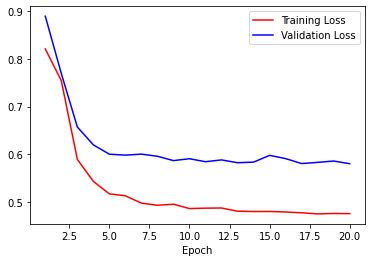

Number of Embedding layers: 36
----------------------------------------------------------------------------------------------------
Epoch 1/20
149/149 [==============================] - 4s 11ms/step - loss: 0.8230 - accuracy: 0.4893 - val_loss: 0.8801 - val_accuracy: 0.5126
Epoch 2/20
149/149 [==============================] - 1s 8ms/step - loss: 0.7425 - accuracy: 0.6526 - val_loss: 0.7421 - val_accuracy: 0.8145
Epoch 3/20
149/149 [==============================] - 1s 8ms/step - loss: 0.5704 - accuracy: 0.9139 - val_loss: 0.6863 - val_accuracy: 0.8482
Epoch 4/20
149/149 [==============================] - 1s 8ms/step - loss: 0.5431 - accuracy: 0.9342 - val_loss: 0.6140 - val_accuracy: 0.9494
Epoch 5/20
149/149 [==============================] - 1s 8ms/step - loss: 0.5226 - accuracy: 0.9418 - val_loss: 0.6227 - val_accuracy: 0.9241
Epoch 6/20
149/149 [==============================] - 1s 8ms/step - loss: 0.5159 - accuracy: 0.9460 - val_loss: 0.6088 - val_accuracy: 0.9570
Epoch 7/20
149/

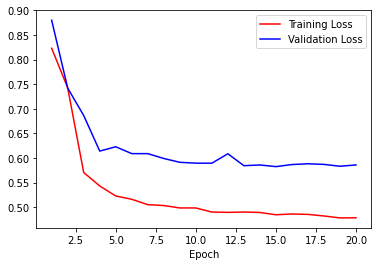

Number of Embedding layers: 38
----------------------------------------------------------------------------------------------------


In [ ]:
for n in range(20,40,2):   
  model = Sequential()

  model.add(Embedding(num_total_words, n, input_length=max_length))
  model.add(LSTM(64, dropout=0.5))
  model.add(Dense(1, activation="softplus"))
  
  model.compile(loss="poisson", optimizer="Adamax", metrics=["accuracy"])
  train_and_vizualize_model(model, 20)
  print("Number of Embedding layers:", n)
  print("-"*100)
  n = n*2

So the best number of embedding layers is 36

# **Choosing the depth of LSTM layer**

Epoch 1/20
149/149 [==============================] - 3s 10ms/step - loss: 0.8303 - accuracy: 0.4554 - val_loss: 0.8808 - val_accuracy: 0.4865
Epoch 2/20
149/149 [==============================] - 1s 7ms/step - loss: 0.8159 - accuracy: 0.5395 - val_loss: 0.8778 - val_accuracy: 0.5084
Epoch 3/20
149/149 [==============================] - 1s 7ms/step - loss: 0.8069 - accuracy: 0.5752 - val_loss: 0.8788 - val_accuracy: 0.5160
Epoch 4/20
149/149 [==============================] - 1s 7ms/step - loss: 0.7962 - accuracy: 0.5870 - val_loss: 0.8782 - val_accuracy: 0.5228
Epoch 5/20
149/149 [==============================] - 1s 7ms/step - loss: 0.7794 - accuracy: 0.6277 - val_loss: 0.8601 - val_accuracy: 0.6594
Epoch 6/20
149/149 [==============================] - 1s 7ms/step - loss: 0.6676 - accuracy: 0.8669 - val_loss: 0.6970 - val_accuracy: 0.9013
Epoch 7/20
149/149 [==============================] - 1s 7ms/step - loss: 0.5862 - accuracy: 0.9416 - val_loss: 0.6684 - val_accuracy: 0.9258
Epoch

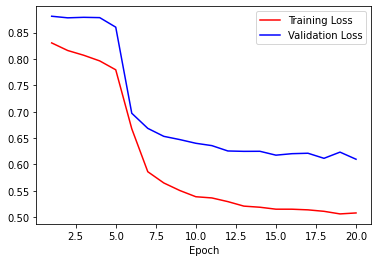

Number of LSTM layers: 4
----------------------------------------------------------------------------------------------------
Epoch 1/20
149/149 [==============================] - 4s 11ms/step - loss: 0.8336 - accuracy: 0.4535 - val_loss: 0.8796 - val_accuracy: 0.4874
Epoch 2/20
149/149 [==============================] - 1s 8ms/step - loss: 0.8171 - accuracy: 0.5191 - val_loss: 0.8797 - val_accuracy: 0.4587
Epoch 3/20
149/149 [==============================] - 1s 8ms/step - loss: 0.8035 - accuracy: 0.5628 - val_loss: 0.8844 - val_accuracy: 0.5228
Epoch 4/20
149/149 [==============================] - 1s 8ms/step - loss: 0.7789 - accuracy: 0.6243 - val_loss: 0.8518 - val_accuracy: 0.6535
Epoch 5/20
149/149 [==============================] - 1s 8ms/step - loss: 0.6439 - accuracy: 0.8686 - val_loss: 0.7049 - val_accuracy: 0.8879
Epoch 6/20
149/149 [==============================] - 1s 8ms/step - loss: 0.5776 - accuracy: 0.9241 - val_loss: 0.6710 - val_accuracy: 0.8887
Epoch 7/20
149/149 [=

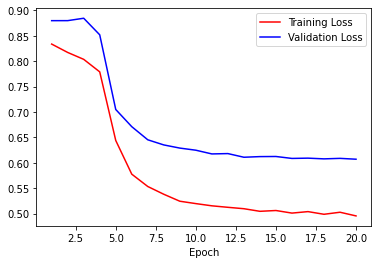

Number of LSTM layers: 8
----------------------------------------------------------------------------------------------------
Epoch 1/20
149/149 [==============================] - 3s 10ms/step - loss: 0.8296 - accuracy: 0.4516 - val_loss: 0.8833 - val_accuracy: 0.5034
Epoch 2/20
149/149 [==============================] - 1s 8ms/step - loss: 0.8090 - accuracy: 0.5571 - val_loss: 0.8807 - val_accuracy: 0.5185
Epoch 3/20
149/149 [==============================] - 1s 8ms/step - loss: 0.6921 - accuracy: 0.7720 - val_loss: 0.6966 - val_accuracy: 0.8752
Epoch 4/20
149/149 [==============================] - 1s 8ms/step - loss: 0.5650 - accuracy: 0.9296 - val_loss: 0.6436 - val_accuracy: 0.9342
Epoch 5/20
149/149 [==============================] - 1s 8ms/step - loss: 0.5377 - accuracy: 0.9466 - val_loss: 0.6296 - val_accuracy: 0.9241
Epoch 6/20
149/149 [==============================] - 1s 8ms/step - loss: 0.5306 - accuracy: 0.9481 - val_loss: 0.6222 - val_accuracy: 0.9317
Epoch 7/20
149/149 [=

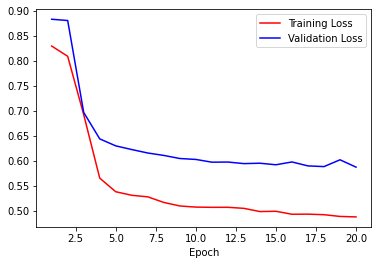

Number of LSTM layers: 16
----------------------------------------------------------------------------------------------------
Epoch 1/20
149/149 [==============================] - 3s 10ms/step - loss: 0.8262 - accuracy: 0.4653 - val_loss: 0.8889 - val_accuracy: 0.4519
Epoch 2/20
149/149 [==============================] - 1s 7ms/step - loss: 0.7514 - accuracy: 0.6393 - val_loss: 0.7278 - val_accuracy: 0.8145
Epoch 3/20
149/149 [==============================] - 1s 7ms/step - loss: 0.5904 - accuracy: 0.8872 - val_loss: 0.6644 - val_accuracy: 0.8980
Epoch 4/20
149/149 [==============================] - 1s 7ms/step - loss: 0.5417 - accuracy: 0.9395 - val_loss: 0.6312 - val_accuracy: 0.9199
Epoch 5/20
149/149 [==============================] - 1s 8ms/step - loss: 0.5248 - accuracy: 0.9420 - val_loss: 0.6136 - val_accuracy: 0.9410
Epoch 6/20
149/149 [==============================] - 1s 7ms/step - loss: 0.5225 - accuracy: 0.9561 - val_loss: 0.6162 - val_accuracy: 0.9334
Epoch 7/20
149/149 [

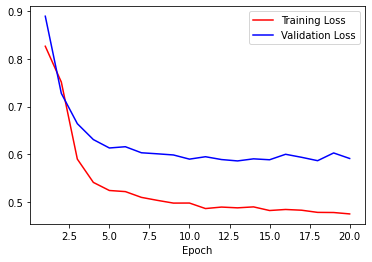

Number of LSTM layers: 32
----------------------------------------------------------------------------------------------------
Epoch 1/20
149/149 [==============================] - 4s 11ms/step - loss: 0.8221 - accuracy: 0.4957 - val_loss: 0.9001 - val_accuracy: 0.5143
Epoch 2/20
149/149 [==============================] - 1s 8ms/step - loss: 0.7093 - accuracy: 0.7015 - val_loss: 0.7843 - val_accuracy: 0.7234
Epoch 3/20
149/149 [==============================] - 1s 8ms/step - loss: 0.5651 - accuracy: 0.9104 - val_loss: 0.6201 - val_accuracy: 0.9359
Epoch 4/20
149/149 [==============================] - 1s 8ms/step - loss: 0.5599 - accuracy: 0.9108 - val_loss: 0.6238 - val_accuracy: 0.9309
Epoch 5/20
149/149 [==============================] - 1s 8ms/step - loss: 0.5263 - accuracy: 0.9471 - val_loss: 0.6041 - val_accuracy: 0.9503
Epoch 6/20
149/149 [==============================] - 1s 8ms/step - loss: 0.5188 - accuracy: 0.9477 - val_loss: 0.6025 - val_accuracy: 0.9587
Epoch 7/20
149/149 [

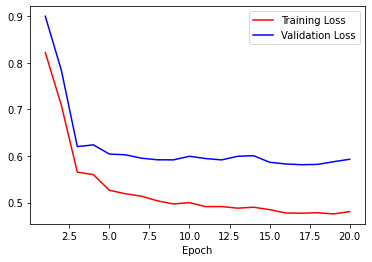

Number of LSTM layers: 64
----------------------------------------------------------------------------------------------------
Epoch 1/20
149/149 [==============================] - 3s 13ms/step - loss: 0.8150 - accuracy: 0.4991 - val_loss: 0.8733 - val_accuracy: 0.5523
Epoch 2/20
149/149 [==============================] - 1s 9ms/step - loss: 0.6048 - accuracy: 0.8534 - val_loss: 0.6129 - val_accuracy: 0.9511
Epoch 3/20
149/149 [==============================] - 1s 9ms/step - loss: 0.5273 - accuracy: 0.9443 - val_loss: 0.6016 - val_accuracy: 0.9570
Epoch 4/20
149/149 [==============================] - 1s 9ms/step - loss: 0.5116 - accuracy: 0.9538 - val_loss: 0.5949 - val_accuracy: 0.9629
Epoch 5/20
149/149 [==============================] - 1s 9ms/step - loss: 0.5066 - accuracy: 0.9614 - val_loss: 0.5975 - val_accuracy: 0.9654
Epoch 6/20
149/149 [==============================] - 1s 9ms/step - loss: 0.4936 - accuracy: 0.9692 - val_loss: 0.5915 - val_accuracy: 0.9688
Epoch 7/20
149/149 [

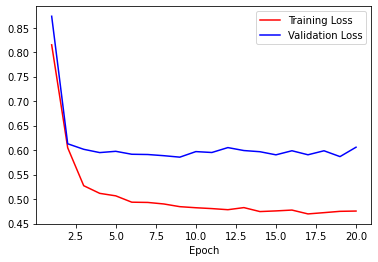

Number of LSTM layers: 128
----------------------------------------------------------------------------------------------------


In [ ]:
n = 4
while n < 130:
  model = Sequential()

  model.add(Embedding(num_total_words, 36, input_length=max_length))
  model.add(LSTM(n, dropout=0.5))
  model.add(Dense(1, activation="softplus"))
  
  model.compile(loss="poisson", optimizer="Adamax", metrics=["accuracy"])
  train_and_vizualize_model(model, 20)
  print("Number of LSTM layers:", n)
  print("-"*100)
  n = n*2

So the best number of LSTM is 64

# **Fine-tuning Dropout**

Epoch 1/20
149/149 [==============================] - 3s 10ms/step - loss: 0.8211 - accuracy: 0.4885 - val_loss: 0.8806 - val_accuracy: 0.5211
Epoch 2/20
149/149 [==============================] - 1s 8ms/step - loss: 0.6489 - accuracy: 0.7992 - val_loss: 0.6896 - val_accuracy: 0.8954
Epoch 3/20
149/149 [==============================] - 1s 8ms/step - loss: 0.5404 - accuracy: 0.9331 - val_loss: 0.6315 - val_accuracy: 0.9545
Epoch 4/20
149/149 [==============================] - 1s 8ms/step - loss: 0.5072 - accuracy: 0.9589 - val_loss: 0.6119 - val_accuracy: 0.9519
Epoch 5/20
149/149 [==============================] - 1s 8ms/step - loss: 0.4986 - accuracy: 0.9654 - val_loss: 0.5972 - val_accuracy: 0.9460
Epoch 6/20
149/149 [==============================] - 1s 8ms/step - loss: 0.4898 - accuracy: 0.9745 - val_loss: 0.6189 - val_accuracy: 0.9553
Epoch 7/20
149/149 [==============================] - 1s 8ms/step - loss: 0.4865 - accuracy: 0.9755 - val_loss: 0.6010 - val_accuracy: 0.9562
Epoch

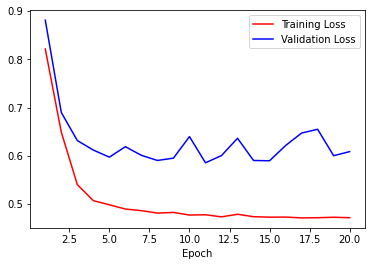

Dropout: 0.0
----------------------------------------------------------------------------------------------------
Epoch 1/20
149/149 [==============================] - 3s 11ms/step - loss: 0.8149 - accuracy: 0.5374 - val_loss: 0.8873 - val_accuracy: 0.5236
Epoch 2/20
149/149 [==============================] - 1s 8ms/step - loss: 0.6288 - accuracy: 0.8304 - val_loss: 0.6119 - val_accuracy: 0.9427
Epoch 3/20
149/149 [==============================] - 1s 8ms/step - loss: 0.5115 - accuracy: 0.9559 - val_loss: 0.6054 - val_accuracy: 0.9494
Epoch 4/20
149/149 [==============================] - 1s 8ms/step - loss: 0.5007 - accuracy: 0.9652 - val_loss: 0.6141 - val_accuracy: 0.9334
Epoch 5/20
149/149 [==============================] - 1s 8ms/step - loss: 0.4899 - accuracy: 0.9726 - val_loss: 0.5880 - val_accuracy: 0.9629
Epoch 6/20
149/149 [==============================] - 1s 8ms/step - loss: 0.4851 - accuracy: 0.9770 - val_loss: 0.5934 - val_accuracy: 0.9519
Epoch 7/20
149/149 [=============

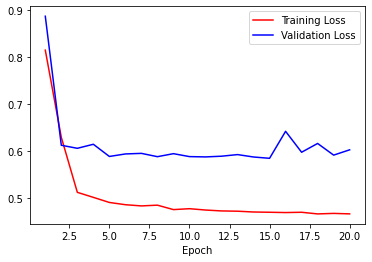

Dropout: 0.1
----------------------------------------------------------------------------------------------------
Epoch 1/20
149/149 [==============================] - 3s 11ms/step - loss: 0.8215 - accuracy: 0.4872 - val_loss: 0.8871 - val_accuracy: 0.5051
Epoch 2/20
149/149 [==============================] - 1s 8ms/step - loss: 0.6863 - accuracy: 0.7416 - val_loss: 0.6622 - val_accuracy: 0.9317
Epoch 3/20
149/149 [==============================] - 1s 8ms/step - loss: 0.5255 - accuracy: 0.9428 - val_loss: 0.6144 - val_accuracy: 0.9519
Epoch 4/20
149/149 [==============================] - 1s 8ms/step - loss: 0.5159 - accuracy: 0.9509 - val_loss: 0.6122 - val_accuracy: 0.9511
Epoch 5/20
149/149 [==============================] - 1s 8ms/step - loss: 0.5011 - accuracy: 0.9658 - val_loss: 0.6257 - val_accuracy: 0.9587
Epoch 6/20
149/149 [==============================] - 1s 8ms/step - loss: 0.4973 - accuracy: 0.9663 - val_loss: 0.5930 - val_accuracy: 0.9570
Epoch 7/20
149/149 [=============

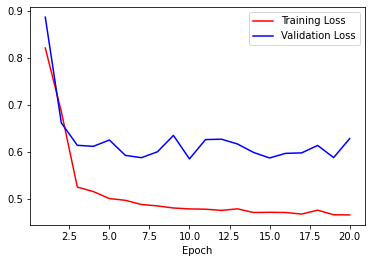

Dropout: 0.2
----------------------------------------------------------------------------------------------------
Epoch 1/20
149/149 [==============================] - 4s 11ms/step - loss: 0.8189 - accuracy: 0.5071 - val_loss: 0.8885 - val_accuracy: 0.5126
Epoch 2/20
149/149 [==============================] - 1s 8ms/step - loss: 0.6997 - accuracy: 0.7313 - val_loss: 0.7341 - val_accuracy: 0.7968
Epoch 3/20
149/149 [==============================] - 1s 8ms/step - loss: 0.5564 - accuracy: 0.9255 - val_loss: 0.6415 - val_accuracy: 0.8997
Epoch 4/20
149/149 [==============================] - 1s 8ms/step - loss: 0.5143 - accuracy: 0.9498 - val_loss: 0.6083 - val_accuracy: 0.9578
Epoch 5/20
149/149 [==============================] - 1s 8ms/step - loss: 0.5015 - accuracy: 0.9656 - val_loss: 0.5955 - val_accuracy: 0.9604
Epoch 6/20
149/149 [==============================] - 1s 8ms/step - loss: 0.4965 - accuracy: 0.9665 - val_loss: 0.5918 - val_accuracy: 0.9637
Epoch 7/20
149/149 [=============

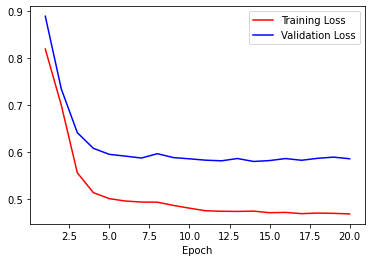

Dropout: 0.30000000000000004
----------------------------------------------------------------------------------------------------
Epoch 1/20
149/149 [==============================] - 3s 10ms/step - loss: 0.8218 - accuracy: 0.4837 - val_loss: 0.9019 - val_accuracy: 0.4519
Epoch 2/20
149/149 [==============================] - 1s 8ms/step - loss: 0.7118 - accuracy: 0.7081 - val_loss: 0.6630 - val_accuracy: 0.9511
Epoch 3/20
149/149 [==============================] - 1s 8ms/step - loss: 0.5364 - accuracy: 0.9346 - val_loss: 0.6044 - val_accuracy: 0.9587
Epoch 4/20
149/149 [==============================] - 1s 8ms/step - loss: 0.5126 - accuracy: 0.9515 - val_loss: 0.5916 - val_accuracy: 0.9637
Epoch 5/20
149/149 [==============================] - 1s 8ms/step - loss: 0.4990 - accuracy: 0.9601 - val_loss: 0.6159 - val_accuracy: 0.9300
Epoch 6/20
149/149 [==============================] - 1s 8ms/step - loss: 0.4986 - accuracy: 0.9656 - val_loss: 0.5932 - val_accuracy: 0.9671
Epoch 7/20
149/14

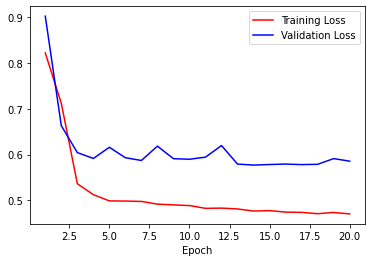

Dropout: 0.4
----------------------------------------------------------------------------------------------------
Epoch 1/20
149/149 [==============================] - 3s 10ms/step - loss: 0.8213 - accuracy: 0.5079 - val_loss: 0.8904 - val_accuracy: 0.5067
Epoch 2/20
149/149 [==============================] - 1s 8ms/step - loss: 0.7055 - accuracy: 0.7241 - val_loss: 0.6574 - val_accuracy: 0.8879
Epoch 3/20
149/149 [==============================] - 1s 8ms/step - loss: 0.5325 - accuracy: 0.9376 - val_loss: 0.6211 - val_accuracy: 0.9309
Epoch 4/20
149/149 [==============================] - 1s 8ms/step - loss: 0.5303 - accuracy: 0.9374 - val_loss: 0.6125 - val_accuracy: 0.9536
Epoch 5/20
149/149 [==============================] - 1s 8ms/step - loss: 0.5148 - accuracy: 0.9477 - val_loss: 0.6238 - val_accuracy: 0.9562
Epoch 6/20
149/149 [==============================] - 1s 8ms/step - loss: 0.5049 - accuracy: 0.9635 - val_loss: 0.6027 - val_accuracy: 0.9545
Epoch 7/20
149/149 [=============

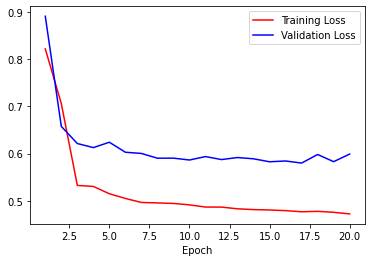

Dropout: 0.5
----------------------------------------------------------------------------------------------------
Epoch 1/20
149/149 [==============================] - 3s 11ms/step - loss: 0.8170 - accuracy: 0.5102 - val_loss: 0.8928 - val_accuracy: 0.5245
Epoch 2/20
149/149 [==============================] - 1s 8ms/step - loss: 0.6583 - accuracy: 0.7887 - val_loss: 0.6585 - val_accuracy: 0.8845
Epoch 3/20
149/149 [==============================] - 1s 8ms/step - loss: 0.5486 - accuracy: 0.9251 - val_loss: 0.6298 - val_accuracy: 0.9511
Epoch 4/20
149/149 [==============================] - 1s 8ms/step - loss: 0.5302 - accuracy: 0.9369 - val_loss: 0.6081 - val_accuracy: 0.9562
Epoch 5/20
149/149 [==============================] - 1s 8ms/step - loss: 0.5183 - accuracy: 0.9483 - val_loss: 0.6112 - val_accuracy: 0.9553
Epoch 6/20
149/149 [==============================] - 1s 8ms/step - loss: 0.5114 - accuracy: 0.9547 - val_loss: 0.5949 - val_accuracy: 0.9621
Epoch 7/20
149/149 [=============

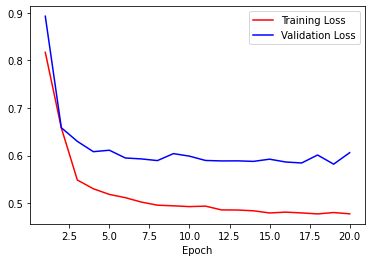

Dropout: 0.6000000000000001
----------------------------------------------------------------------------------------------------
Epoch 1/20
149/149 [==============================] - 3s 11ms/step - loss: 0.8194 - accuracy: 0.4972 - val_loss: 0.8930 - val_accuracy: 0.5093
Epoch 2/20
149/149 [==============================] - 1s 8ms/step - loss: 0.6898 - accuracy: 0.7545 - val_loss: 0.6670 - val_accuracy: 0.8938
Epoch 3/20
149/149 [==============================] - 1s 8ms/step - loss: 0.5574 - accuracy: 0.9175 - val_loss: 0.6278 - val_accuracy: 0.9418
Epoch 4/20
149/149 [==============================] - 1s 8ms/step - loss: 0.5330 - accuracy: 0.9409 - val_loss: 0.6056 - val_accuracy: 0.9444
Epoch 5/20
149/149 [==============================] - 1s 8ms/step - loss: 0.5283 - accuracy: 0.9435 - val_loss: 0.6017 - val_accuracy: 0.9519
Epoch 6/20
149/149 [==============================] - 1s 9ms/step - loss: 0.5210 - accuracy: 0.9481 - val_loss: 0.5979 - val_accuracy: 0.9536
Epoch 7/20
149/149

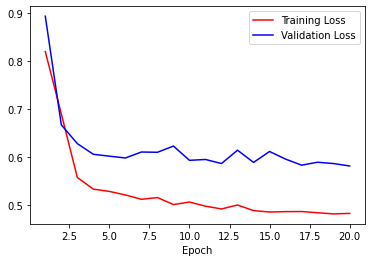

Dropout: 0.7000000000000001
----------------------------------------------------------------------------------------------------
Epoch 1/20
149/149 [==============================] - 4s 11ms/step - loss: 0.8212 - accuracy: 0.5199 - val_loss: 0.8936 - val_accuracy: 0.4519
Epoch 2/20
149/149 [==============================] - 1s 8ms/step - loss: 0.7813 - accuracy: 0.6009 - val_loss: 0.7922 - val_accuracy: 0.6956
Epoch 3/20
149/149 [==============================] - 1s 8ms/step - loss: 0.6056 - accuracy: 0.8690 - val_loss: 0.6854 - val_accuracy: 0.8516
Epoch 4/20
149/149 [==============================] - 1s 8ms/step - loss: 0.5744 - accuracy: 0.9045 - val_loss: 0.6136 - val_accuracy: 0.9469
Epoch 5/20
149/149 [==============================] - 1s 8ms/step - loss: 0.5501 - accuracy: 0.9260 - val_loss: 0.6133 - val_accuracy: 0.9368
Epoch 6/20
149/149 [==============================] - 1s 8ms/step - loss: 0.5360 - accuracy: 0.9369 - val_loss: 0.6359 - val_accuracy: 0.9165
Epoch 7/20
149/149

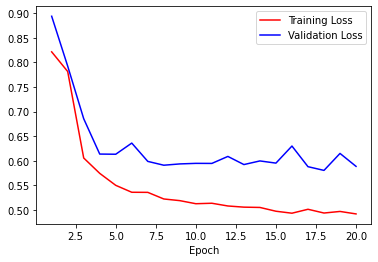

Dropout: 0.8
----------------------------------------------------------------------------------------------------
Epoch 1/20
149/149 [==============================] - 3s 10ms/step - loss: 0.8220 - accuracy: 0.4974 - val_loss: 0.8840 - val_accuracy: 0.5093
Epoch 2/20
149/149 [==============================] - 1s 8ms/step - loss: 0.8035 - accuracy: 0.5722 - val_loss: 0.8895 - val_accuracy: 0.5481
Epoch 3/20
149/149 [==============================] - 1s 8ms/step - loss: 0.7052 - accuracy: 0.7283 - val_loss: 0.7169 - val_accuracy: 0.8204
Epoch 4/20
149/149 [==============================] - 1s 8ms/step - loss: 0.6371 - accuracy: 0.8302 - val_loss: 0.7176 - val_accuracy: 0.8212
Epoch 5/20
149/149 [==============================] - 1s 8ms/step - loss: 0.6006 - accuracy: 0.8709 - val_loss: 0.6521 - val_accuracy: 0.8895
Epoch 6/20
149/149 [==============================] - 1s 8ms/step - loss: 0.5988 - accuracy: 0.8728 - val_loss: 0.6221 - val_accuracy: 0.9342
Epoch 7/20
149/149 [=============

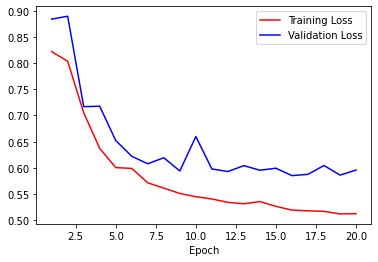

Dropout: 0.9
----------------------------------------------------------------------------------------------------


In [ ]:
for x in np.arange(0,1,0.1):
  model = Sequential()

  model.add(Embedding(num_total_words, 36, input_length=max_length))
  model.add(LSTM(64, dropout=x))
  model.add(Dense(1, activation="softplus"))
  
  model.compile(loss="poisson", optimizer="Adamax", metrics=["accuracy"])
  train_and_vizualize_model(model, 20)
  print("Dropout:", x)
  print("-"*100)
  n = n*2

So the best dropout is 0.4

#**Best Parameters**

Loss Function: poisson 

Optimizer: Adamax


Activation: softplus


Embedding Depth: 36


LSTM Layer Depth: 64

Dropout: 0.4

# **Final Model**

Epoch 1/30
149/149 [==============================] - 3s 11ms/step - loss: 0.8171 - accuracy: 0.5263 - val_loss: 0.8796 - val_accuracy: 0.5160
Epoch 2/30
149/149 [==============================] - 1s 8ms/step - loss: 0.6515 - accuracy: 0.7950 - val_loss: 0.6688 - val_accuracy: 0.8820
Epoch 3/30
149/149 [==============================] - 1s 8ms/step - loss: 0.5343 - accuracy: 0.9371 - val_loss: 0.6114 - val_accuracy: 0.9444
Epoch 4/30
149/149 [==============================] - 1s 8ms/step - loss: 0.5159 - accuracy: 0.9515 - val_loss: 0.6229 - val_accuracy: 0.9275
Epoch 5/30
149/149 [==============================] - 1s 8ms/step - loss: 0.5067 - accuracy: 0.9568 - val_loss: 0.6253 - val_accuracy: 0.9216
Epoch 6/30
149/149 [==============================] - 1s 8ms/step - loss: 0.4966 - accuracy: 0.9654 - val_loss: 0.5879 - val_accuracy: 0.9629
Epoch 7/30
149/149 [==============================] - 1s 8ms/step - loss: 0.4916 - accuracy: 0.9703 - val_loss: 0.5880 - val_accuracy: 0.9637
Epoch

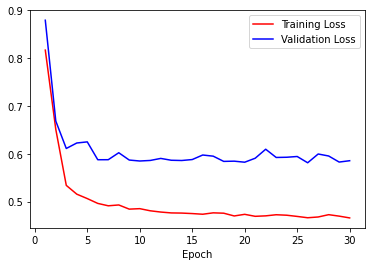

In [ ]:
model = Sequential()

model.add(Embedding(num_total_words, 36, input_length=max_length))
model.add(LSTM(64, dropout=0.4))
model.add(Dense(1, activation="softplus"))

model.compile(loss="poisson", optimizer="Adamax", metrics=["accuracy"])
train_and_vizualize_model(model, 30)

In [ ]:
score = model.evaluate(test_padded, test_labels, verbose=0)

print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.5858830809593201
Test accuracy: 0.9696458578109741


In [ ]:
models_dir = "drive/Shared drives/PMDL Project/Models"
pickle_lstm = open(models_dir + "/LSTM.pickle","wb")
pickle.dump(model, pickle_lstm)
pickle_lstm.close()

INFO:tensorflow:Assets written to: ram://d6fdc3af-d0d9-4aae-b1f5-9b86fa127190/assets


INFO:tensorflow:Assets written to: ram://d6fdc3af-d0d9-4aae-b1f5-9b86fa127190/assets
